In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
df['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
obj = 0
num = 0
for i in df.columns:
    if np.dtype(df[i]) == 'object':
        obj = obj+1
    else:
        num = num + 1

In [7]:
obj, num

(43, 38)

# Missing Data

In [8]:
df.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageType        64
GarageCond        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
BsmtExposure      31
BsmtFinType2      31
BsmtFinType1      30
BsmtCond          30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
Exterior2nd        0
Exterior1st        0
dtype: int64

## PoolQC : Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Thus Nan values means no pool, so we will replace nan with 'No Pool'

In [9]:
df['PoolQC'].fillna('No Pool', inplace = True)

## MiscFeature 

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [10]:
df['MiscFeature'].fillna('None', inplace = True)

## Alley

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [11]:
df['Alley'].fillna('No alley access', inplace = True)

## Fence

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	    Good Wood
       MnWw	    Minimum Wood/Wire
       NA	    No Fence

In [12]:
df['Fence'].fillna('No Fence', inplace = True)

## FireplaceQu : Fireplace Quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [13]:
df['FireplaceQu'].fillna('No Fireplace', inplace= True)

## LotFrontage: Linear feet of street connected to property

/home/aditya/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/aditya/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([151., 511., 245.,  34.,   7.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <a list of 10 Patch objects>)

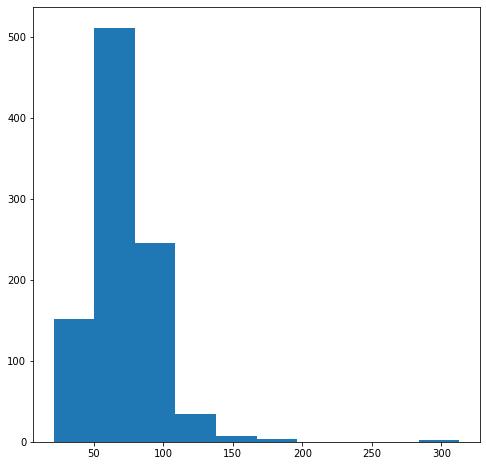

In [14]:
plt.figure(figsize = (8,8))
plt.hist(df['LotFrontage'])

In [15]:
df['LotFrontage'].value_counts().head(10)

60.0    111
80.0     60
70.0     58
75.0     46
50.0     44
65.0     35
85.0     26
90.0     20
78.0     19
73.0     16
Name: LotFrontage, dtype: int64

In [16]:
print('Median :', df['LotFrontage'].median())
print('Mean :', np.mean(df['LotFrontage']))

Median : 70.0
Mean : 70.98846960167715


we will fill the Nan value with the median.

In [17]:
df['LotFrontage'].fillna(70.0, inplace = True)

## GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
           NA	No Garage

In [18]:
df['GarageType'].nunique()

6

In [19]:
df['GarageType'].fillna('No Garage', inplace = True)

## GarageYrBlt: Year garage was built

In [20]:
df[df['GarageType'] == 'No Garage']['GarageYrBlt'].isnull().sum()

64

In [21]:
df[df['GarageType'] == 'No Garage'].shape[0]

64

So We will fill the null values with '0'

In [22]:
df['GarageYrBlt'].fillna(0, inplace = True)

## GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [23]:
df['GarageFinish'].fillna('No Garage', inplace = True)

## GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [24]:
df['GarageQual'].fillna('No Garage', inplace = True)

## GarageCond: Condition of Garage

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond and GarageQual seems to be closely related

In [25]:
df['GarageCond'].fillna('No Garage', inplace = True)

## BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [26]:
df['BsmtFinType2'].fillna('No Basement', inplace=True)

## BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [27]:
df[df['BsmtFinType2'] == 'No Basement']['BsmtExposure'].shape

(31,)

In [28]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

In [29]:
df['BsmtExposure'].fillna('No Basement', inplace = True)

## BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [30]:
df['BsmtFinType1'].unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan], dtype=object)

In [31]:
df['BsmtFinType1'].fillna('No Basement', inplace = True)

## BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [32]:
df['BsmtCond'].fillna('No Basement', inplace = True)

## BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [33]:
df['BsmtQual'].fillna('No Basement', inplace = True)

## MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	    None
       Stone	Stone

In [34]:
df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

We will fill the 7 Nan values with None

In [35]:
df['MasVnrType'].fillna('None', inplace = True)

## MasVnrArea: Masonry veneer area in square feet

In [36]:
df['MasVnrArea'].value_counts()

0.0      692
72.0       7
120.0      6
180.0      6
106.0      5
        ... 
443.0      1
105.0      1
894.0      1
650.0      1
567.0      1
Name: MasVnrArea, Length: 283, dtype: int64

In [37]:
df[df['MasVnrArea'].isnull()].MasVnrType

68     None
78     None
99     None
185    None
224    None
367    None
874    None
Name: MasVnrType, dtype: object

So the null values are for No Masonry Veneer

In [38]:
df['MasVnrArea'].fillna(0, inplace = True)

# Outliers

In [39]:
num = df.select_dtypes('number')
num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120         70.0     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20         70.0    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          1976         0.0         120  ...           0          205   
1          1970         0.0         351  ...          81          207   
2          1997         0.0         862  ...         180          130   
3          1977       480.0         705  ...           0          122   
4          2000       126.0        1246  ...         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000  

[5 rows x 38 columns]

In [40]:
def outlier(column):
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    low_lim = q1 - 1.5*iqr
    upp_lim = q3 + 1.5*iqr
    length = len(df)
    outliers = 0
    for i in df[column]:
        if ((i > upp_lim) or (i < low_lim)):
            outliers = outliers + 1
    print('% of Outliers for {} : '.format(column), (outliers/length)*100)

In [41]:
for x in num.columns.to_list():
    outlier(x)

% of Outliers for Id :  0.0
% of Outliers for MSSubClass :  6.763698630136987
% of Outliers for LotFrontage :  7.02054794520548
% of Outliers for LotArea :  6.078767123287672
% of Outliers for OverallQual :  0.17123287671232876
% of Outliers for OverallCond :  8.904109589041095
% of Outliers for YearBuilt :  0.5136986301369862
% of Outliers for YearRemodAdd :  0.0
% of Outliers for MasVnrArea :  6.592465753424658
% of Outliers for BsmtFinSF1 :  0.5993150684931506
% of Outliers for BsmtFinSF2 :  11.643835616438356
% of Outliers for BsmtUnfSF :  1.7123287671232876
% of Outliers for TotalBsmtSF :  4.623287671232877
% of Outliers for 1stFlrSF :  1.6267123287671232
% of Outliers for 2ndFlrSF :  0.17123287671232876
% of Outliers for LowQualFinSF :  1.9691780821917808
% of Outliers for GrLivArea :  1.9691780821917808
% of Outliers for BsmtFullBath :  0.08561643835616438
% of Outliers for BsmtHalfBath :  5.3938356164383565
% of Outliers for FullBath :  0.0
% of Outliers for HalfBath :  0.0
% o

There are a few outliers present in the dataset, we are going to ignore SalePrice as it is Target Variable

So we will not remove the outliers, but try to set them to the max value/min value respectively

    MSSubClass
    LotFrontage
    LotArea
    MasVnrArea
    TotalBsmtSF

In [42]:
df.isnull().sum().sort_values(ascending = False)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
Id              0
Length: 81, dtype: int64

In [43]:
df['MSSubClass']

0       120
1        20
2        60
3        20
4        20
       ... 
1163     20
1164     20
1165    160
1166     70
1167     60
Name: MSSubClass, Length: 1168, dtype: int64

In [44]:
def outlier(column):
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    print(q1, ' ', q3)
    iqr = q3 - q1
    print(iqr)
    low_lim = q1 - 1.5*iqr
    upp_lim = q3 + 1.5*iqr
    print(column)
    print(low_lim)
    print(upp_lim)
    print()
    length = len(df)
    outliers = 0
    n=0
    for i in df[column]:
        if (i > upp_lim):
            df[column].loc[n] = upp_lim
        elif (i< low_lim):
            df[column].loc[n] = low_lim
        n = n+1

In [45]:
for x in ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea','TotalBsmtSF',]:
    outlier(x)

20.0   70.0
50.0
MSSubClass
-55.0
145.0

60.0   79.25
19.25
LotFrontage
31.125
108.125

7621.5   11515.5
3894.0
LotArea
1780.5
17356.5

0.0   160.0
160.0
MasVnrArea
-240.0
400.0

799.0   1291.5
492.5
TotalBsmtSF
60.25
2030.25



/home/aditya/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0  127       120.0       RL         70.0   4928.0   Pave  No alley access   
1  889        20.0       RL         95.0  15865.0   Pave  No alley access   
2  793        60.0       RL         92.0   9920.0   Pave  No alley access   
3  110        20.0       RL        105.0  11751.0   Pave  No alley access   
4  422        20.0       RL         70.0  16635.0   Pave  No alley access   

  LotShape LandContour Utilities  ... PoolArea   PoolQC     Fence MiscFeature  \
0      IR1         Lvl    AllPub  ...        0  No Pool  No Fence        None   
1      IR1         Lvl    AllPub  ...        0  No Pool  No Fence        None   
2      IR1         Lvl    AllPub  ...        0  No Pool  No Fence        None   
3      IR1         Lvl    AllPub  ...        0  No Pool     MnPrv        None   
4      IR1         Lvl    AllPub  ...        0  No Pool  No Fence        None   

  MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       0      2   2007        WD         Normal     128000  
1       0     10   2007        WD         Normal     268000  
2       0      6   2007        WD         Normal     269790  
3       0      1   2010       COD         Normal     190000  
4       0      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

# Exploratory Data Analysis

First lets check numeric variable

In [47]:
num['Id'].nunique()

1168

The Feature Id offers no predictive value, so it can be dropped

In [48]:
df.drop('Id', axis =1, inplace = True)

### LotFrontage

In [49]:
def plotgraph(column, description):
    #1.Histogram + Density plot
    plt.figure(figsize = (10,7))
    sns.distplot(df[column])
    plt.title(column)
    plt.xlabel(description)
    #2.Boxplot
    plt.figure(figsize = (8,5))
    sns.boxplot(df[column])
    #3.Scatterplot
    plt.figure(figsize = (10,7))
    sns.scatterplot(x = df['SalePrice'], y = df[column])
    #4 pearsonr
    r,p = pearsonr(x = df['SalePrice'], y = df[column])
    print(r)

0.36697415842437975


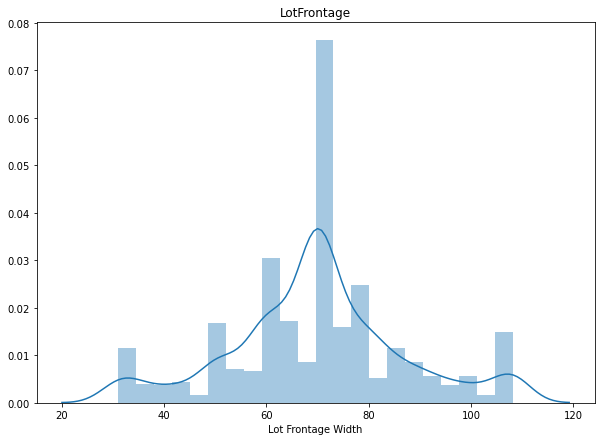

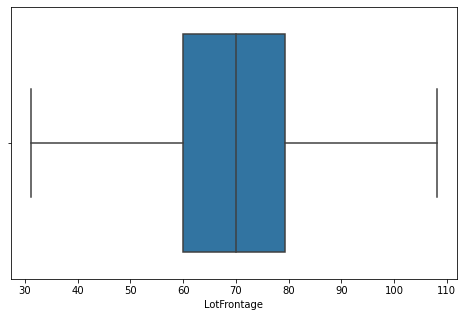

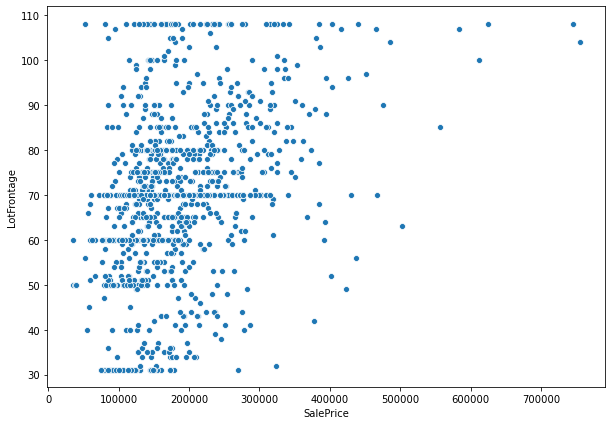

In [50]:
plotgraph('LotFrontage', 'Lot Frontage Width')

The variable has a normal distribution with right skew. There are outliers present in the feature, but we wont remove them

There seem to be positive correlation between Sale Price and LotFrontage. 

### LotArea

0.41873688711865265


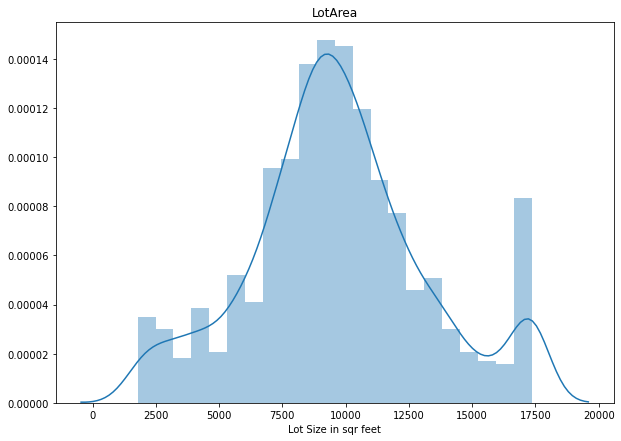

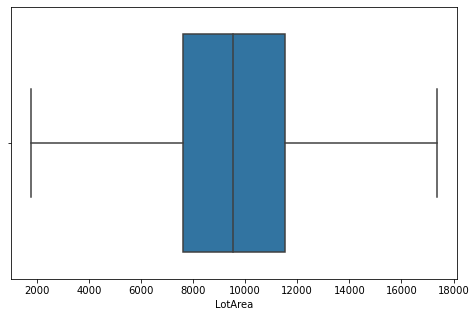

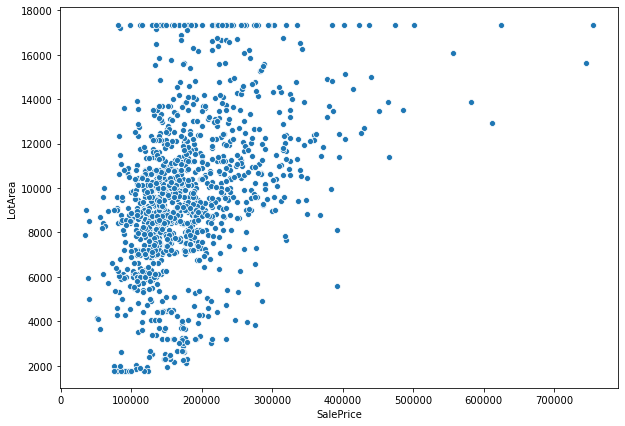

In [51]:
plotgraph('LotArea', 'Lot Size in sqr feet')

resembles more of logarithmic distribution than normal distribution

Many extreme outliers are present in the feature

Here there is small positive correlation between LotArea and SalePrice

### MasVnrArea

0.4340721124874694


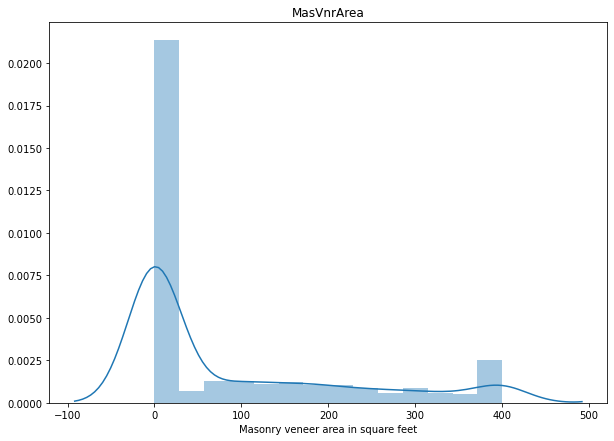

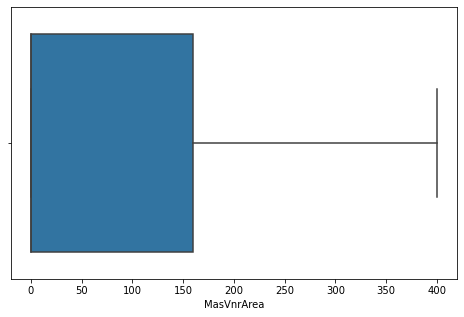

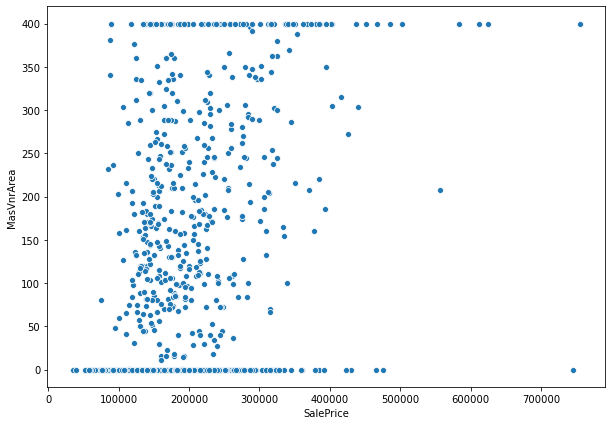

In [52]:
plotgraph('MasVnrArea', 'Masonry veneer area in square feet')

Right Skewed, many houses dont seem to have Masonry Veneer (A type of stone wall used in old houses), so the area is 0.0

There is positive correlation between both the variables

### BsmtFinSF1

0.3628743616872131


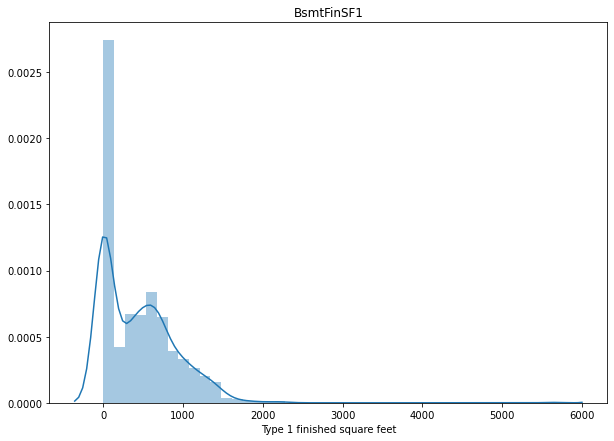

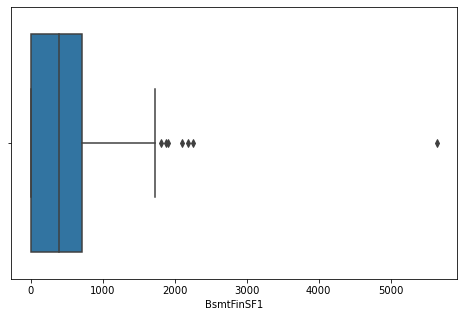

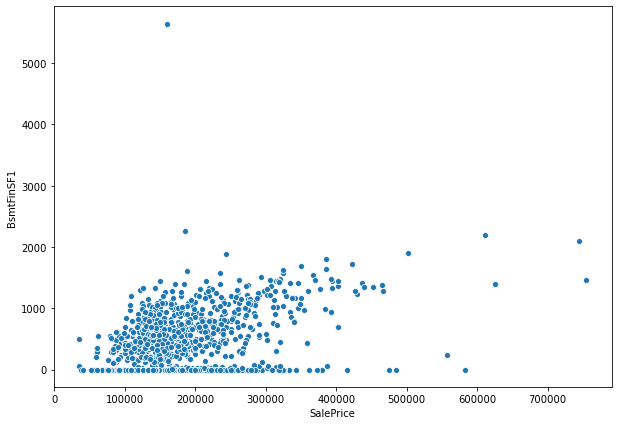

In [53]:
plotgraph('BsmtFinSF1', 'Type 1 finished square feet')

Not a normal distribution, has two peaks. Only a few outliers present.

Positive correlation between SalePrice and Basement Square footage

### BsmtFinSF2

/home/aditya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


-0.010150773483223212


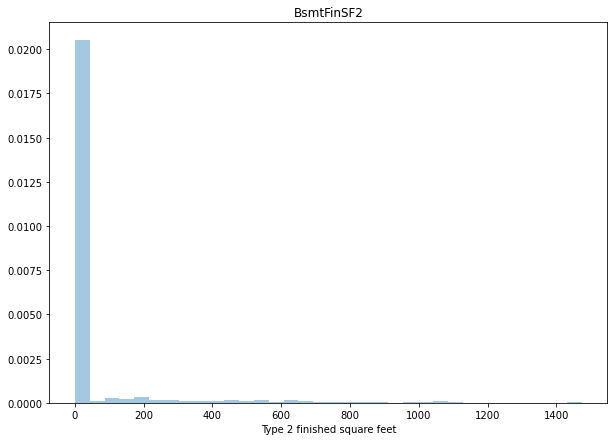

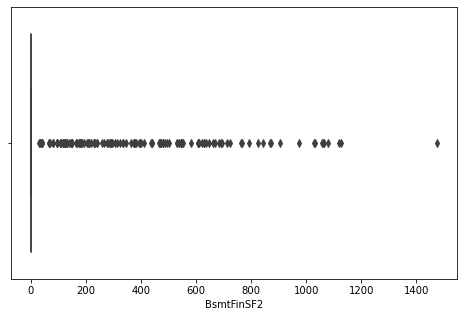

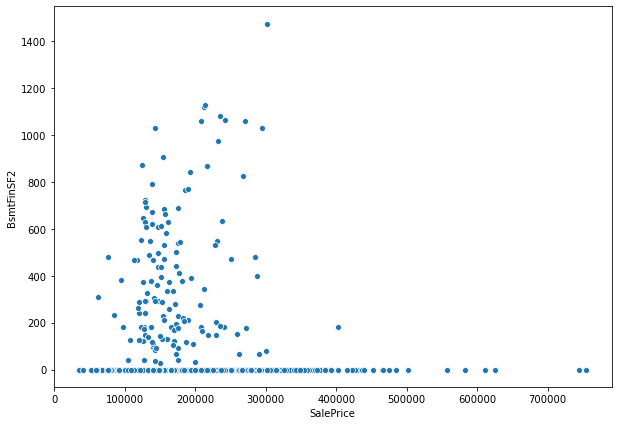

In [54]:
plotgraph('BsmtFinSF2', 'Type 2 finished square feet')

In [55]:
df['BsmtFinSF2'].value_counts()

0      1032
180       5
374       2
290       2
182       2
       ... 
547       1
551       1
580       1
606       1
362       1
Name: BsmtFinSF2, Length: 122, dtype: int64

nearly 90% of the values seem to be '0'. This feature wont provide a significant predicting value to the model. So dropping this column

In [56]:
df.drop('BsmtFinSF2', axis = 1, inplace = True)

### BsmtUnfSF

0.21572414208173135


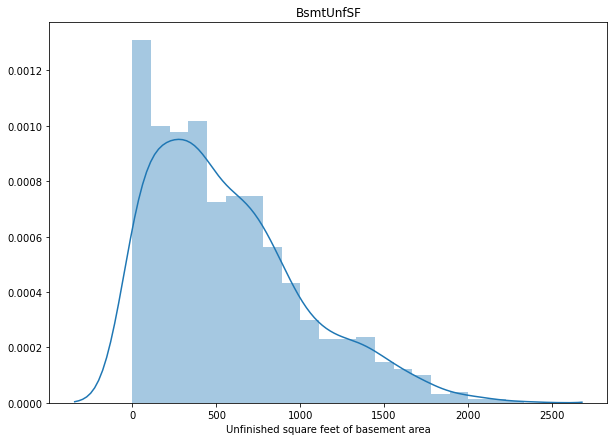

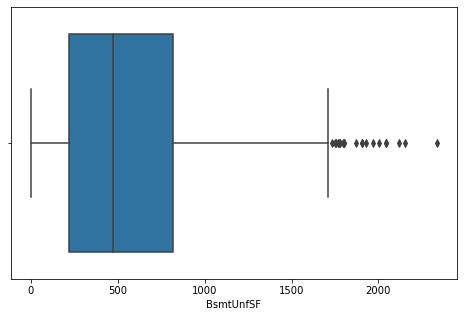

In [57]:
plotgraph('BsmtUnfSF', 'Unfinished square feet of basement area')

The correlation seems to be weak. The distribution is normal and outliers are few

### TotalBsmtSF

0.6272420991224752


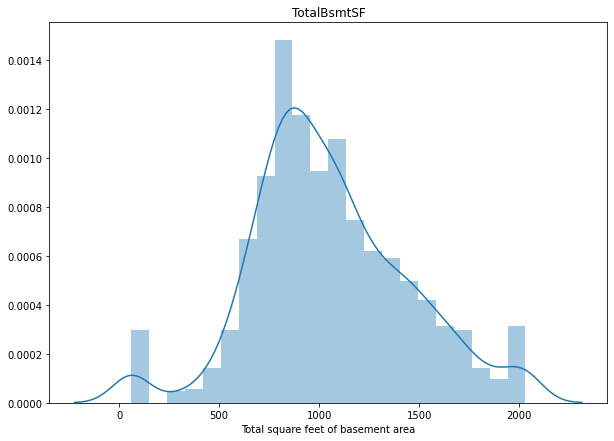

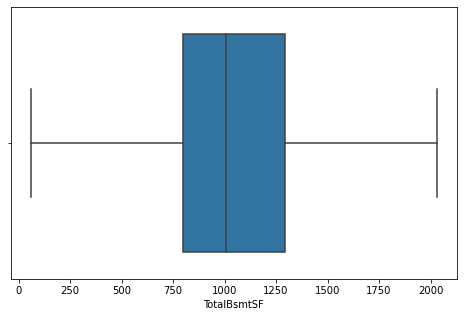

In [58]:
plotgraph('TotalBsmtSF', 'Total square feet of basement area')

This provides a good positive correlation between the two values, and the distribution is normal, with a few outliers.

There are 3 Features related to Basement: BsmtFinSF1, BsmtUnfSF, TotalBsmtSf.
We will try to remove the feature with least importance.

### 1stFlrSF

In [59]:
plotgraph('1stFlrSF', 'First Floor square feet')

0.587642277736237


Positive Correlation to SalePrice, The distribution seems to be normal with a slight right skew

### 2ndFlrSF

0.3303862976369544


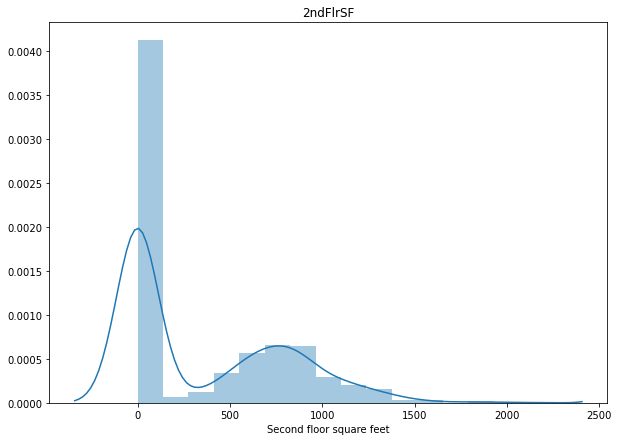

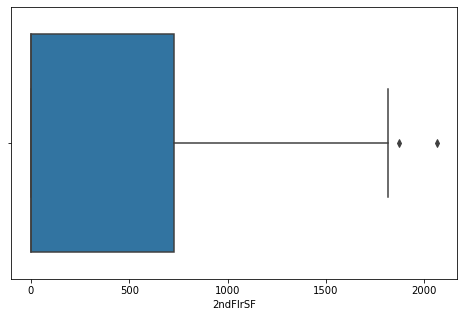

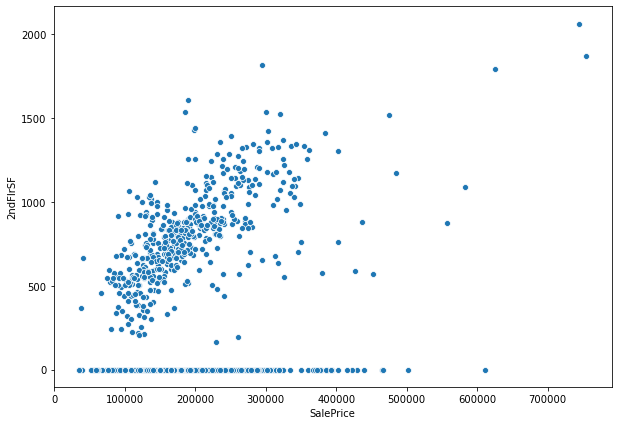

In [60]:
plotgraph('2ndFlrSF', 'Second floor square feet')

In [61]:
df['2ndFlrSF'].value_counts()

0       663
728       9
504       7
600       6
546       6
       ... 
1134      1
1141      1
788       1
787       1
1872      1
Name: 2ndFlrSF, Length: 351, dtype: int64

Nearly 50% of houses dont have second floor, but SalePrice of the house and having large Second Floor area are strongly correlated, as we see in the graph.

There is a slight curve in the scatter plot. Maybe we can use Polynomial Features for this variable.

### LowQualFinSF

/home/aditya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


-0.032381093911827766


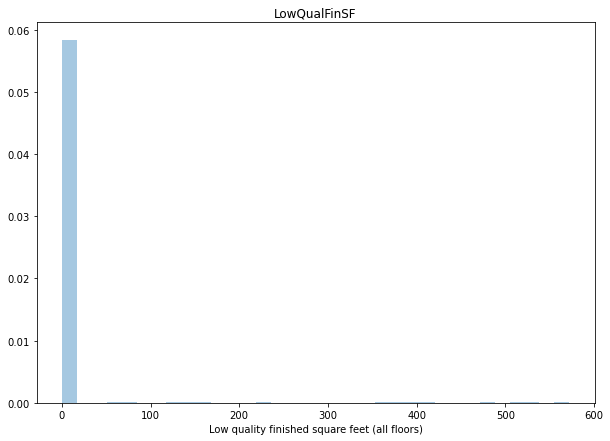

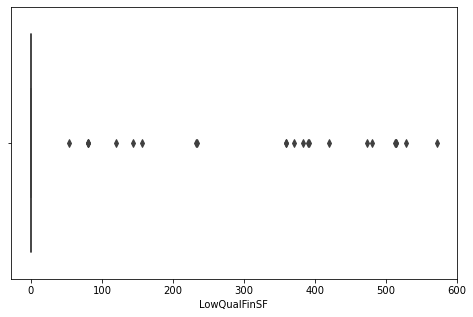

In [62]:
plotgraph('LowQualFinSF', 'Low quality finished square feet (all floors)')

In [63]:
df['LowQualFinSF'].value_counts()

0      1145
80        3
360       2
371       1
53        1
120       1
144       1
156       1
232       1
234       1
572       1
528       1
390       1
392       1
420       1
473       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

98% of the values is zero, so we will remove the feature

In [64]:
df.drop('LowQualFinSF', axis = 1, inplace = True)

### GrLivArea

0.7073004254041904


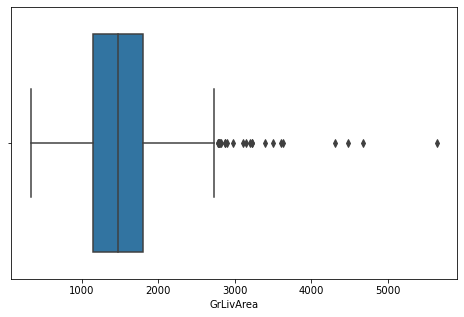

In [65]:
plotgraph('GrLivArea', 'Above grade (ground) living area square feet')

Strong Positive correlation between SalePrice and Above ground living area

The distribution is also normal, with only a few outliers

### GarageArea

0.6189999328245079


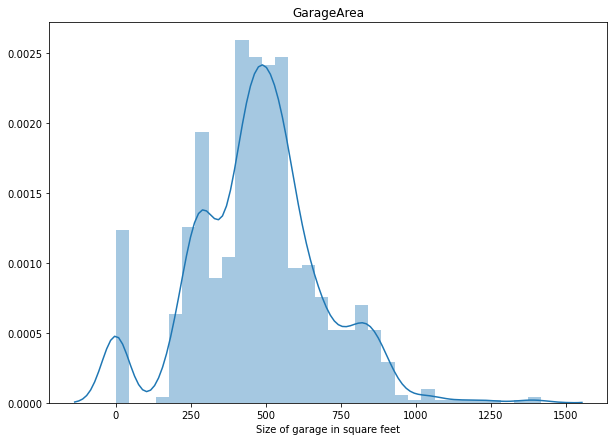

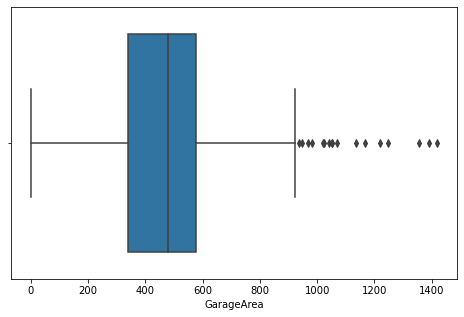

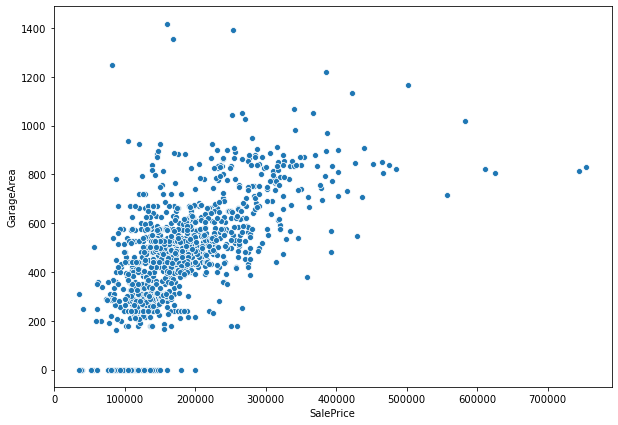

In [66]:
plotgraph('GarageArea', 'Size of garage in square feet')

Strong positive correlation between SalePrice and size of Garage. The Distribution is normal and has multiple peaks, with a few outliers.

### WoodDeckSF

0.31544416227339667


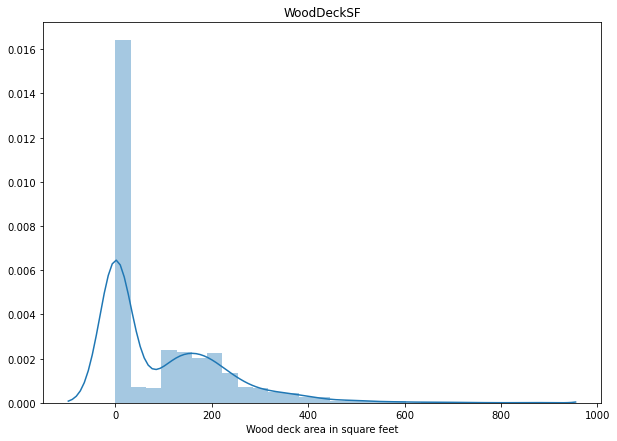

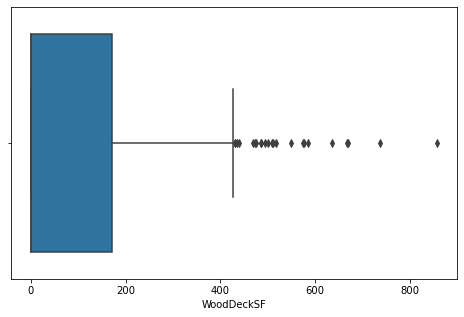

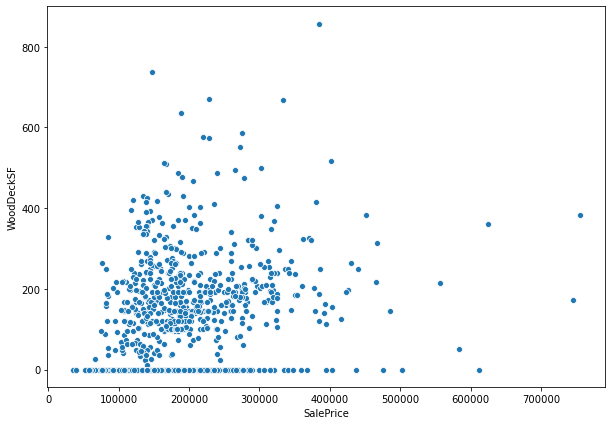

In [67]:
plotgraph('WoodDeckSF', 'Wood deck area in square feet')

In [68]:
df['WoodDeckSF'].value_counts()

0      603
144     29
192     28
100     26
120     25
      ... 
185      1
342      1
183      1
344      1
857      1
Name: WoodDeckSF, Length: 244, dtype: int64

nearly 50% of the houses don't have Wooden Decks. But there is weak positive correlation between having wooden decks and SalePrice

Also the distribution isn't normal and has multiple peaks

### OpenPorchSF

0.33949955918549046


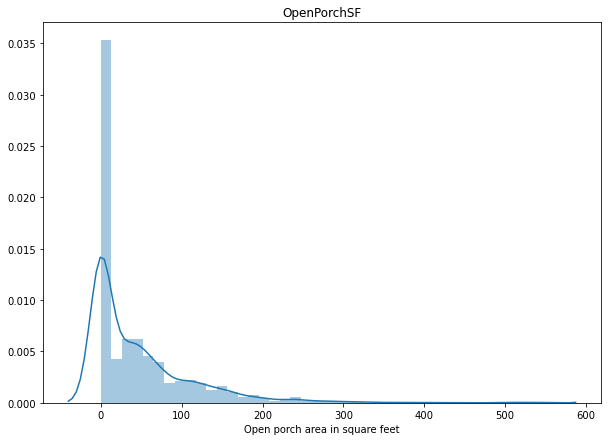

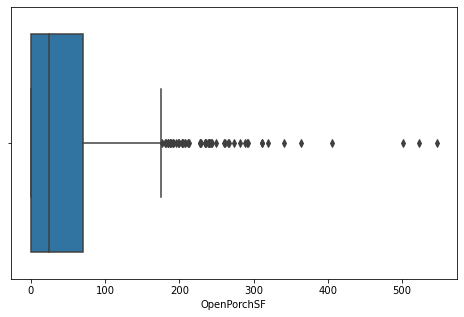

In [69]:
plotgraph('OpenPorchSF', 'Open porch area in square feet')

Weak correlation between Open porch area in square feet and Sale Price. Many Outliers are present in the data

### EnclosedPorch

/home/aditya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


-0.11500378798803138


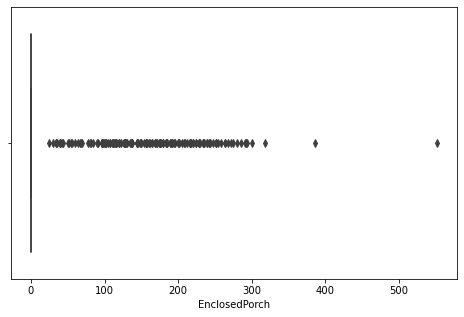

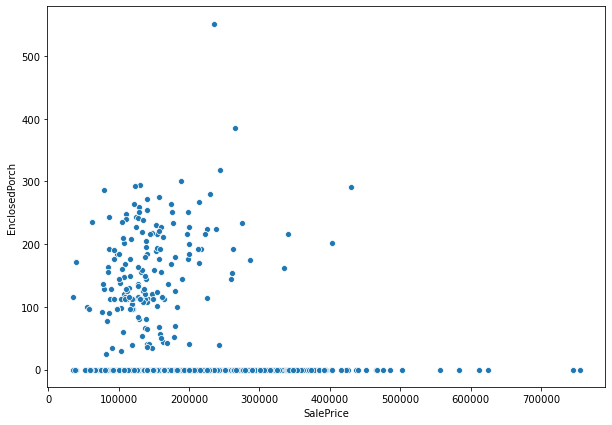

In [70]:
plotgraph('EnclosedPorch', 'Enclosed porch area in square feet')

In [71]:
df['EnclosedPorch'].value_counts()

0      999
112     13
96       6
192      5
216      5
      ... 
196      1
200      1
205      1
208      1
160      1
Name: EnclosedPorch, Length: 106, dtype: int64

Even though the Scatterpot shows correlation, the feature has 0 in 85% of the rows, so wont provide much predictive value. So it would be better to remove this feature

In [72]:
df.drop('EnclosedPorch', axis = 1, inplace = True)

### 3SsnPorch

/home/aditya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


0.06011898984976178


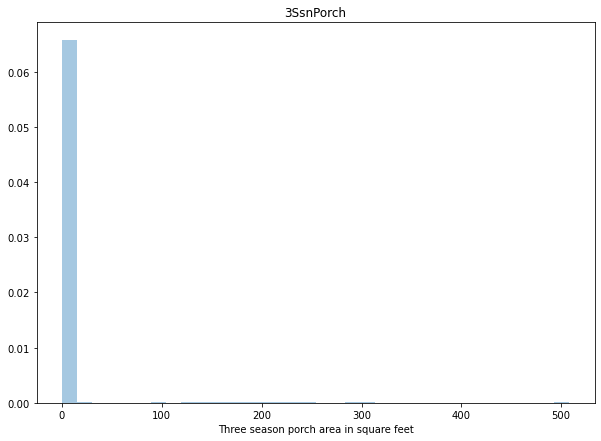

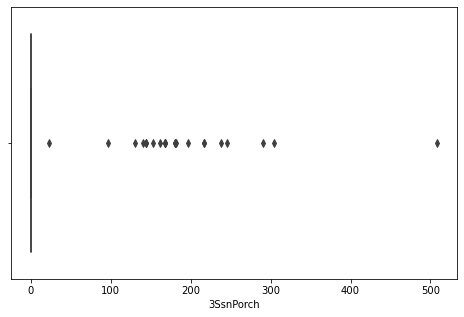

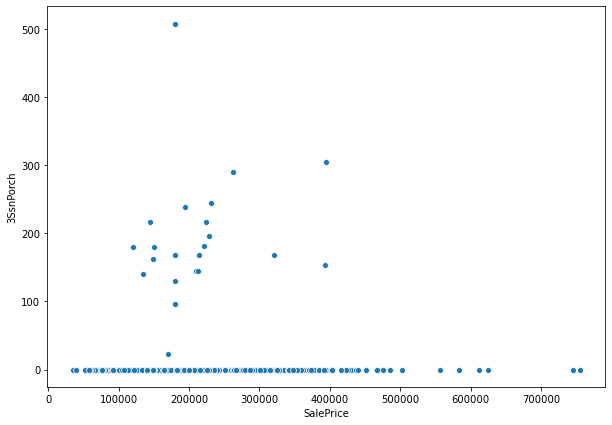

In [73]:
plotgraph('3SsnPorch', 'Three season porch area in square feet')

In [74]:
df['3SsnPorch'].value_counts()

0      1146
168       3
216       2
180       2
144       2
290       1
245       1
238       1
196       1
182       1
304       1
162       1
153       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

Dropping this feature too.

In [75]:
df.drop('3SsnPorch', axis = 1, inplace = True)

### ScreenPorch

/home/aditya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


0.10028431826184259


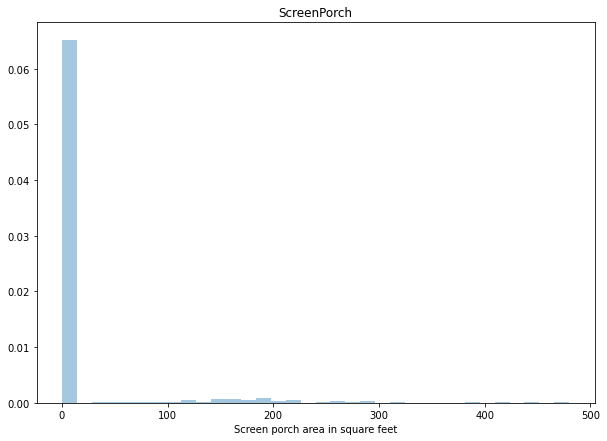

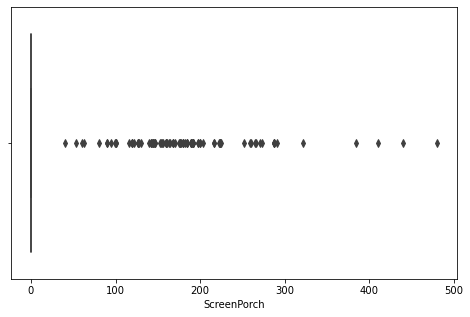

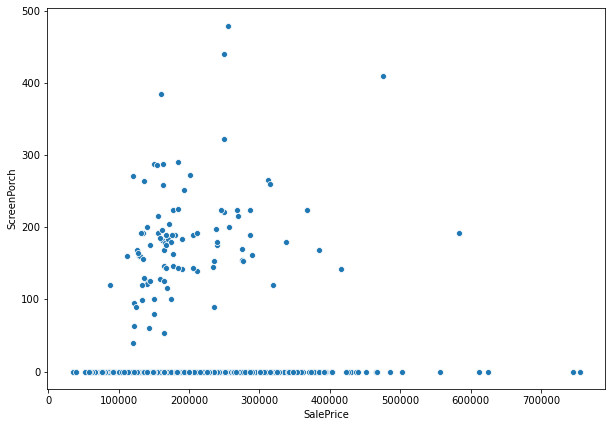

In [76]:
plotgraph('ScreenPorch', 'Screen porch area in square feet')

In [77]:
df['ScreenPorch'].value_counts()

0      1073
192       5
224       5
189       4
126       3
       ... 
178       1
440       1
170       1
165       1
175       1
Name: ScreenPorch, Length: 65, dtype: int64

Dropping the feature

In [78]:
df.drop('ScreenPorch', axis = 1, inplace = True)

### PoolArea

/home/aditya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


0.10328029951783985


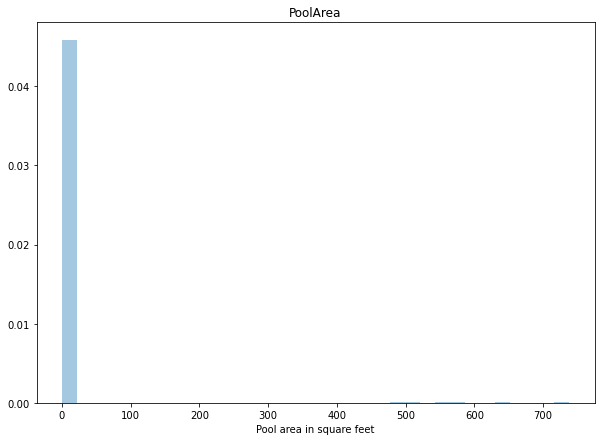

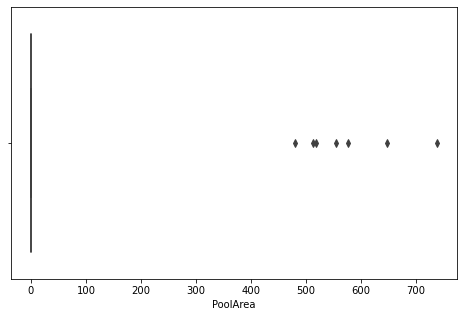

In [79]:
plotgraph('PoolArea', 'Pool area in square feet')

In [80]:
df['PoolArea'].value_counts()

0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

dropping this feature

In [81]:
df.drop('PoolArea', axis = 1, inplace = True)

### 

/home/aditya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


-0.013070866259557964


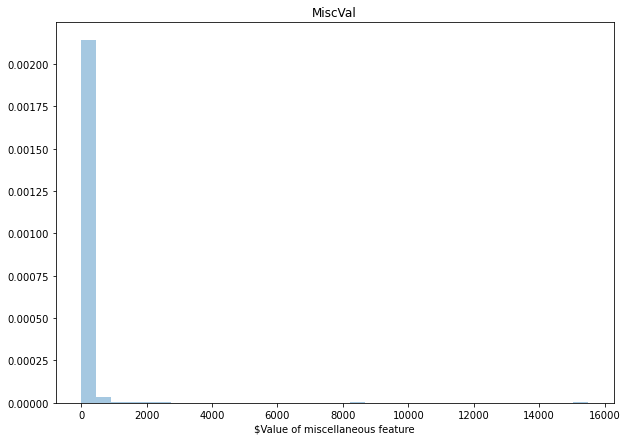

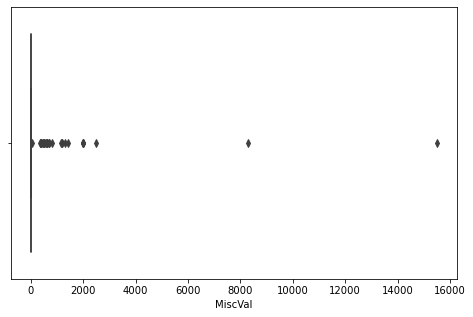

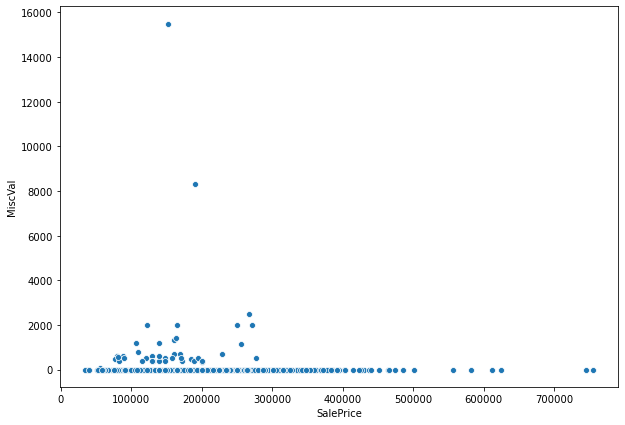

In [82]:
plotgraph('MiscVal', '$Value of miscellaneous feature')

In [83]:
df['MiscVal'].value_counts()

0        1126
400        10
500         7
2000        4
700         3
600         3
1200        2
15500       1
1150        1
800         1
620         1
1400        1
480         1
2500        1
450         1
1300        1
350         1
8300        1
54          1
560         1
Name: MiscVal, dtype: int64

Dropping the feature

In [84]:
df.drop('MiscVal', axis = 1, inplace = True)

### SalePrice

In [85]:
plt.figure(figsize = (10,7))
sns.distplot(df['SalePrice'])
plt.title('SalePrice')
plt.xlabel('Sale Price')

plt.figure(figsize = (8,5))
sns.boxplot(df["SalePrice"])

The Target Variable is normally distributed, with a right skew.

In [86]:
plt.figure(figsize = (20,20))
sns.heatmap(num.corr(), annot = False)

## Categorical Variables

### MSSubClass

In [87]:
def plot(column, desc):
    plt.figure(figsize = (10,8))
    sns.countplot(df[column])
    plt.title(desc)
    plt.figure(figsize = (10,8))
    sns.barplot(x = df[column], y = df['SalePrice'])
    plt.title('SalePrice VS {}'.format(column))

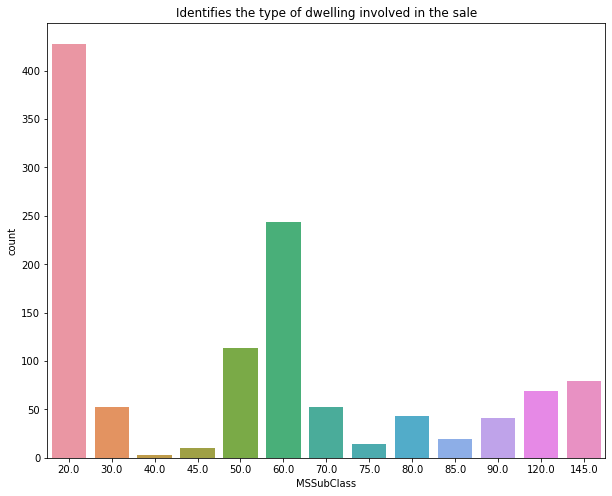

In [88]:
plot('MSSubClass', 'Identifies the type of dwelling involved in the sale')

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

    So the highest Sale Price is for '60': 2 Stories and built after 1946, and second highest is for 120 (1-STORY PUD (Planned Unit Development) - 1946 & NEWER)
    Lowest Price is for 180 (PUD - MULTILEVEL - INCL SPLIT LEV/FOYER) and 30 (1-STORY 1945 & OLDER)
    
    40 (1 strory with Attic) is a risky investment but can get good price, same with 75 (2-1/2 STORY ALL AGES)

### OverallQual

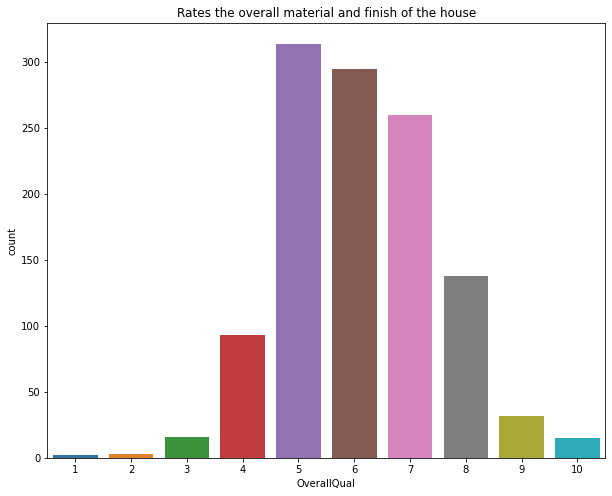

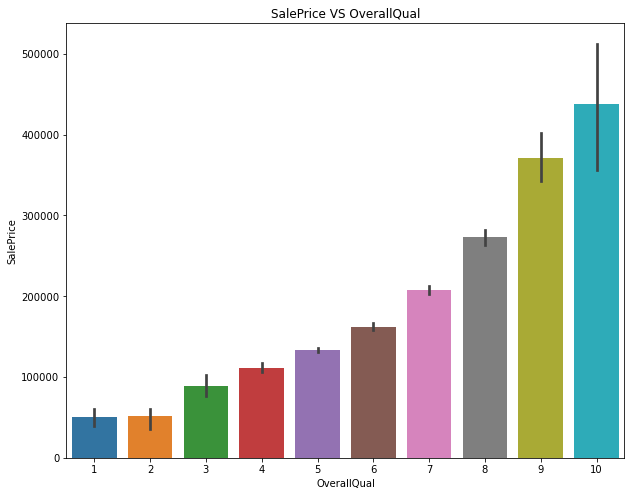

In [89]:
plot('OverallQual','Rates the overall material and finish of the house')

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

As expected, the house with perfect score will have most Sale Price

Most of the houses are rated average, above average and good.

### OverallCond

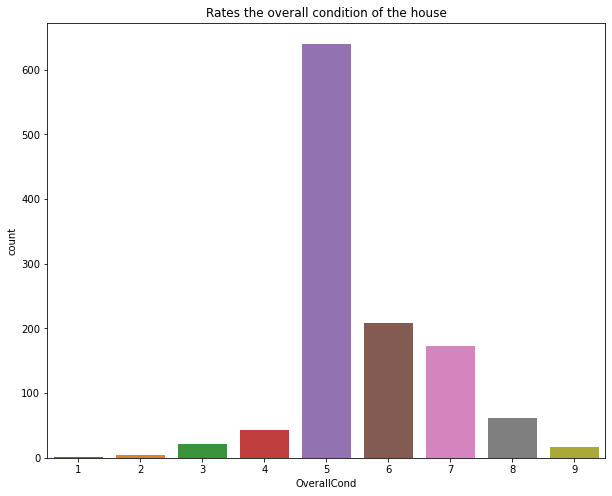

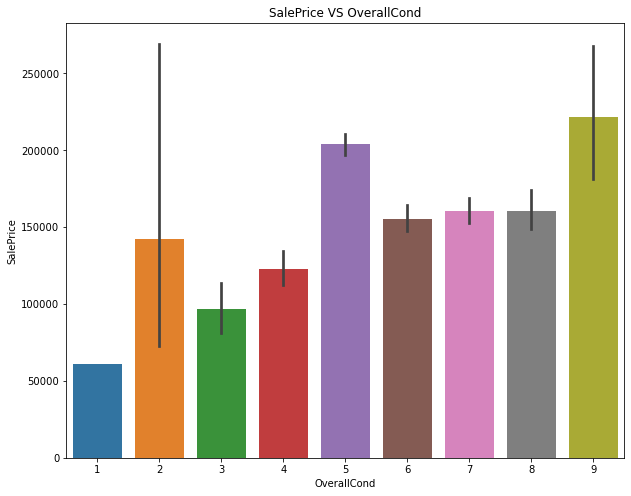

In [90]:
plot('OverallCond', 'Rates the overall condition of the house')

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

Most of the houses are average condition. None of the houses were rated a perfect 10.

In [91]:
df['OverallCond'].unique()

array([5, 6, 7, 4, 8, 2, 3, 9, 1])

### BsmtFullBath

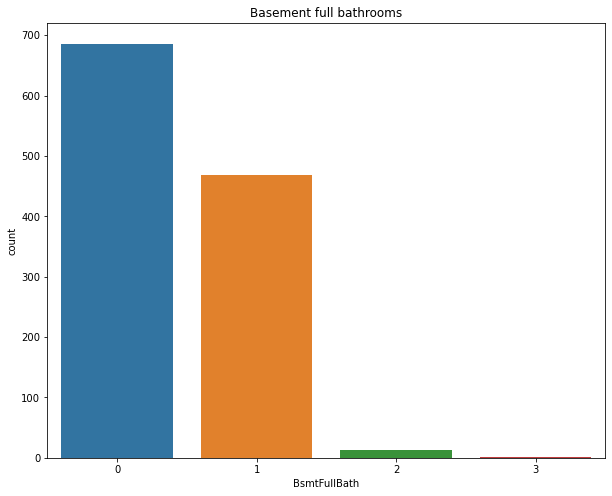

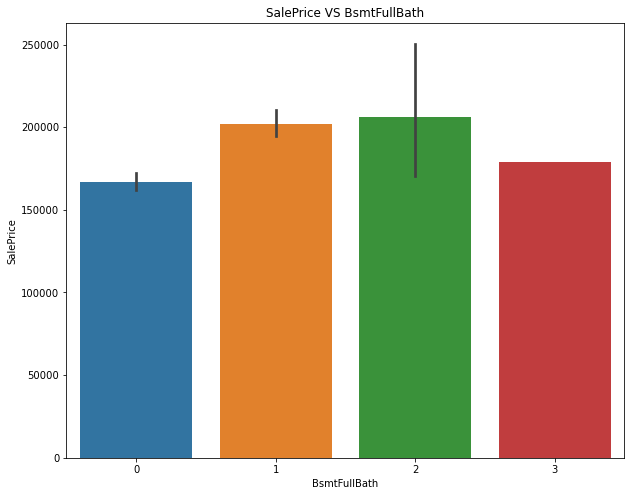

In [92]:
plot('BsmtFullBath', 'Basement full bathrooms')

Most of the houses dont have a bathroom in their basement, or only have one. The availability of bathroom dont seem to affect the Sale Price

### BsmtHalfBath

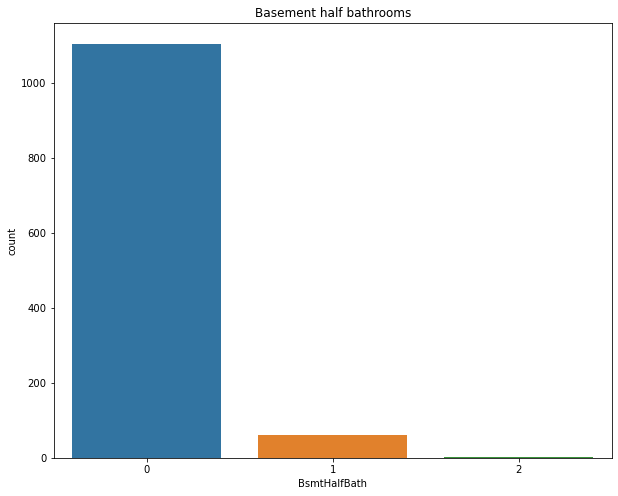

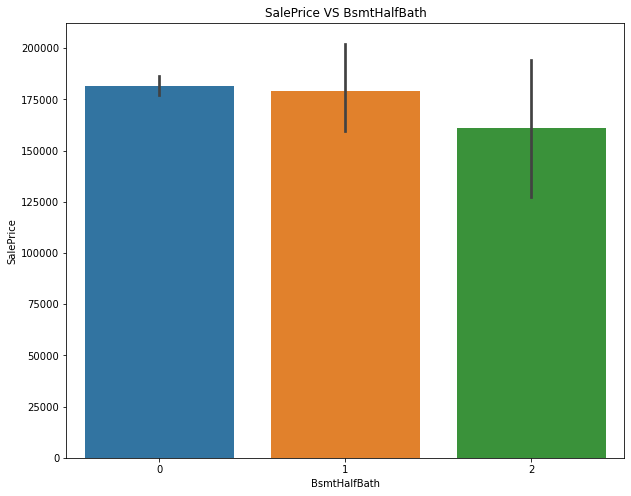

In [93]:
plot('BsmtHalfBath', 'Basement half bathrooms')

In [94]:
df['BsmtHalfBath'].value_counts()

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64

Dropping the feature.

In [95]:
df.drop('BsmtHalfBath', axis = 1, inplace = True)

### FullBath

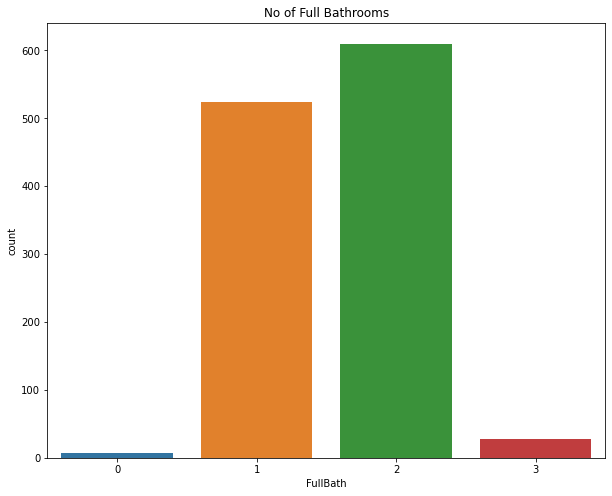

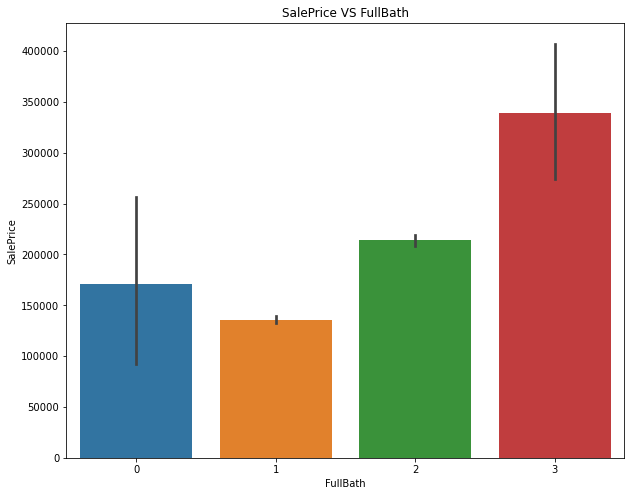

In [96]:
plot('FullBath', 'No of Full Bathrooms')

Most of the houses have 1 or 2 bathrooms.

Having more bathrooms will fetch you more price

### HalfBath

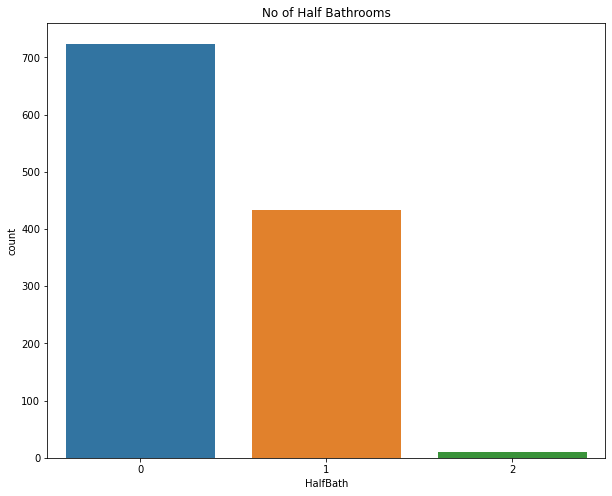

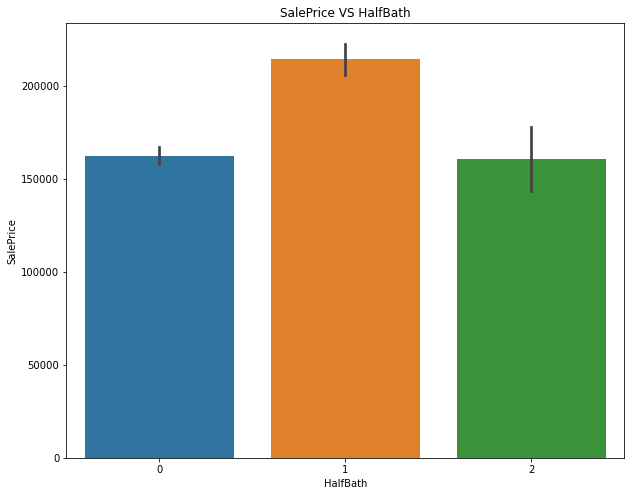

In [97]:
plot('HalfBath', 'No of Half Bathrooms')

Having 1 half bathroom seems to fetch good price. People have no Problem buying house with no half bathrooms

### BedroomAbvGr 

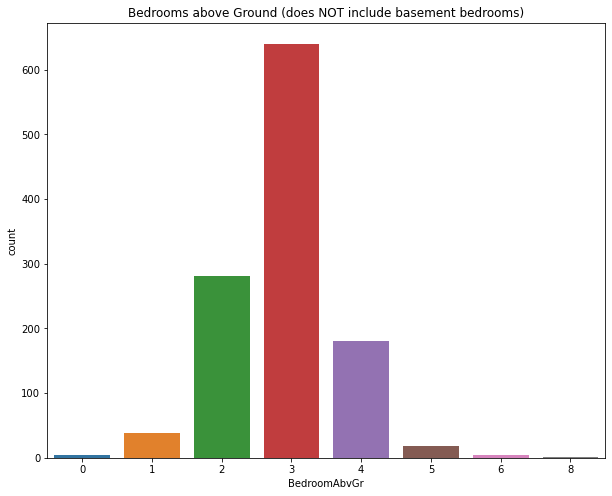

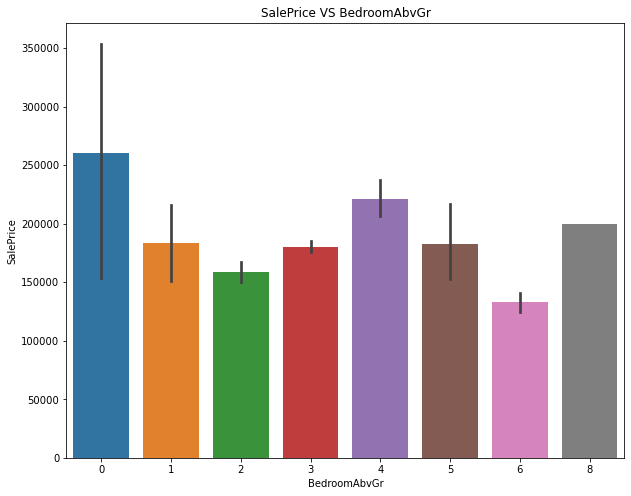

In [98]:
plot('BedroomAbvGr', 'Bedrooms above Ground (does NOT include basement bedrooms)')

Most of the houses have 3 Bedrooms, having an extra bedroom (i.e 4) gets best Sale Price. More bedrooms doesnt mean more Sale Price.

### KitchenAbvGr

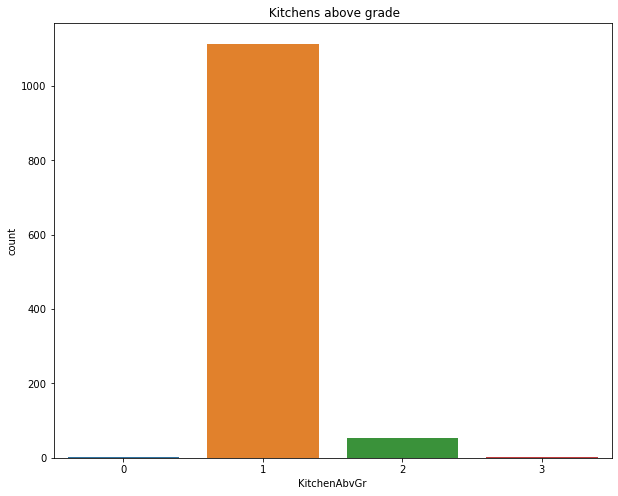

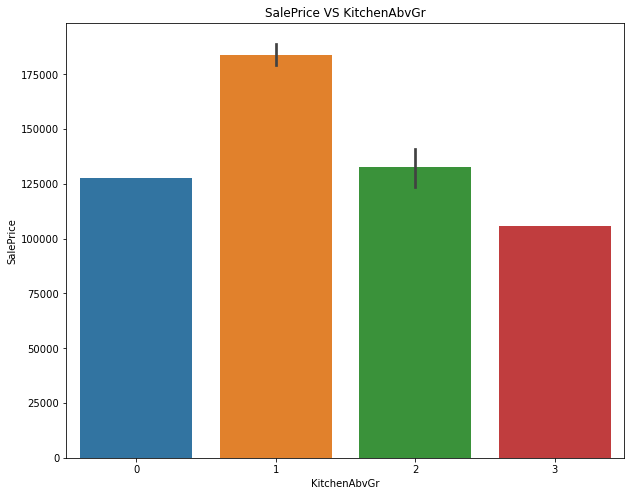

In [99]:
plot('KitchenAbvGr', ' Kitchens above grade')

In [100]:
df['KitchenAbvGr'].value_counts()

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64

Dropping the feature

In [101]:
df.drop('KitchenAbvGr', axis = 1, inplace = True)

### TotRmsAbvGrd

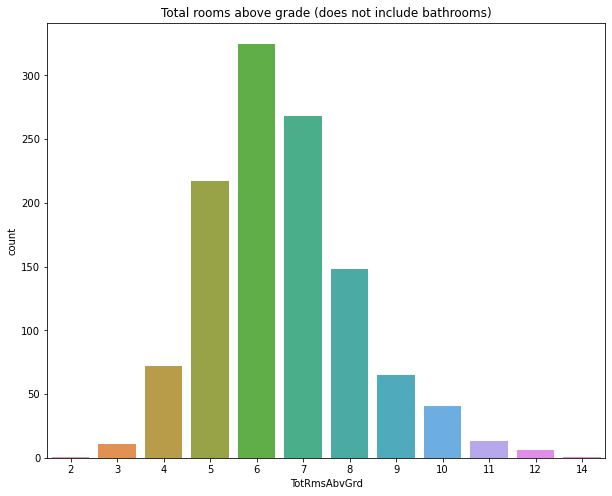

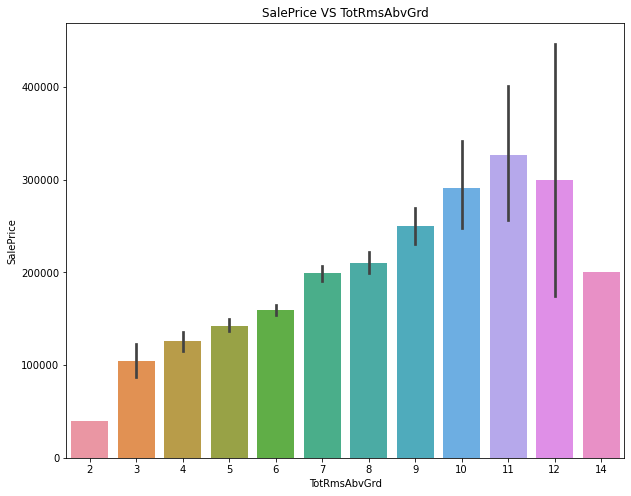

In [102]:
plot('TotRmsAbvGrd', 'Total rooms above grade (does not include bathrooms)')

So, more the no of rooms, more is the price, with 11 and 12 rooms having the most sale price

### Fireplaces

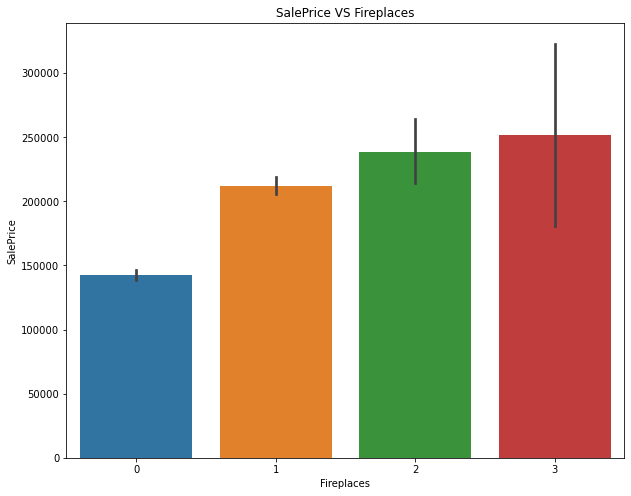

In [103]:
plot('Fireplaces', 'No of Fireplaces')

No of fireplaces doesn't seem to be having much effect on sale price

### GarageCars

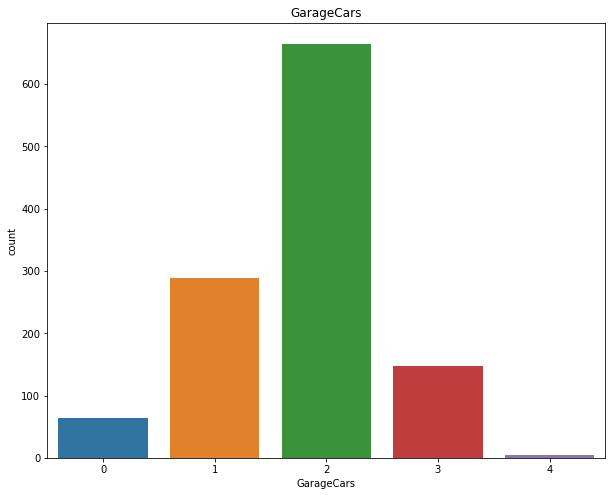

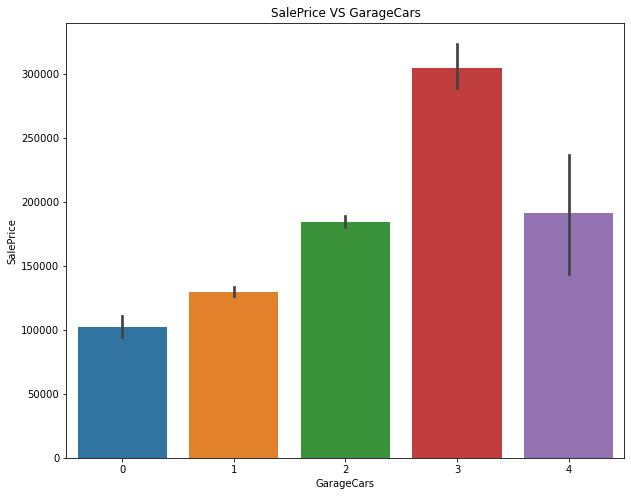

In [104]:
plot('GarageCars', 'GarageCars')

Interesting. Houses with garage space for 3 cars have the most Sale price, even more than a biger garage space with parking for 4 cars

### MoSold

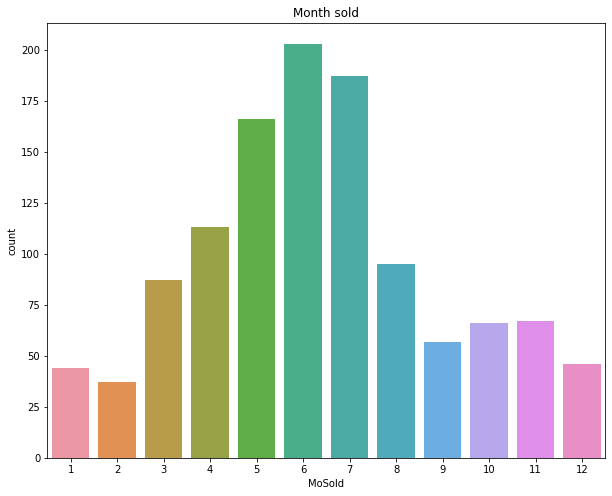

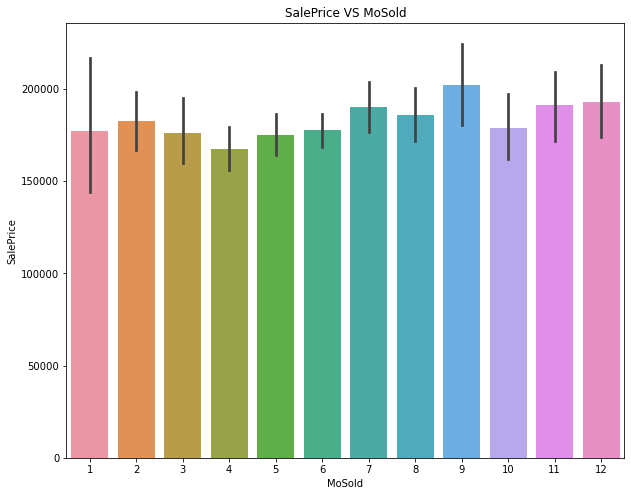

In [105]:
plot('MoSold', 'Month sold')

Houses sold in Sept have higher sale price, but most of the houses are sold in June and a low no are sold in Sept.

Advise: Aggresive Marketing from the month of April - May should drive up the Sales in June - July period.

### YrSold

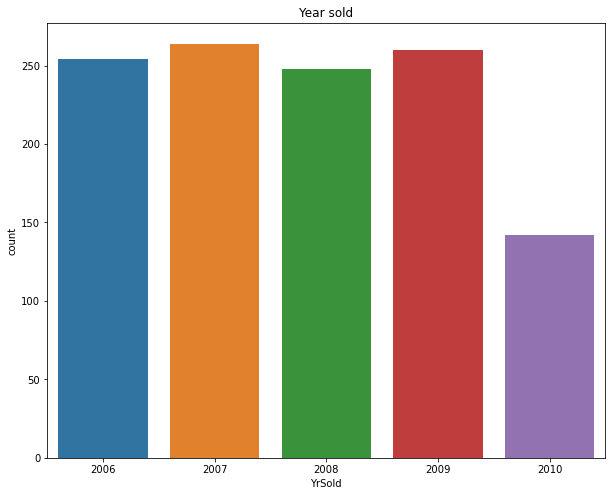

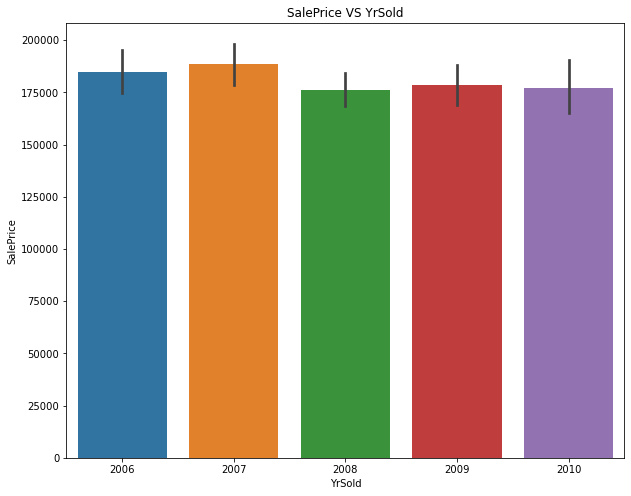

In [106]:
plot('YrSold', 'Year sold')

House prices are falling. It might be an opportune time to buy Houses for the company to flip later at a high price.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   float64
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   float64
 4   Street         1168 non-null   object 
 5   Alley          1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

### MSZoning

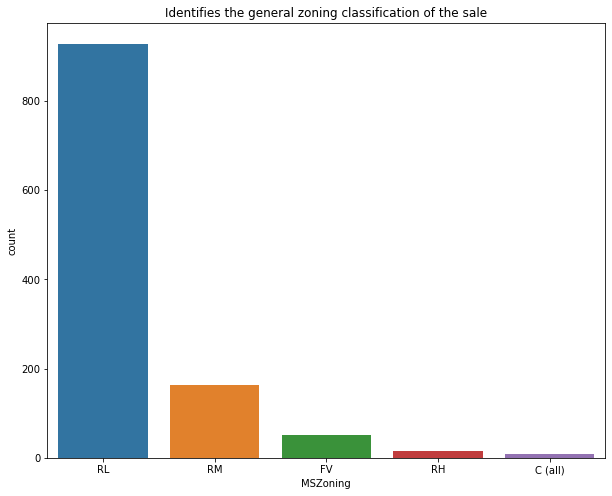

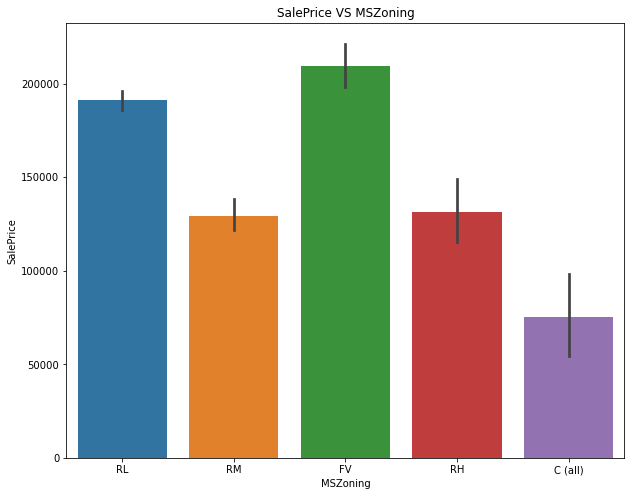

In [108]:
plot('MSZoning', 'Identifies the general zoning classification of the sale')

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Floating Village Residential seems to be having high mean Sale price, though no of such houses are low.

Residential Low Density are high in number

Houses in commercial areas aren't worth investing in

### Street

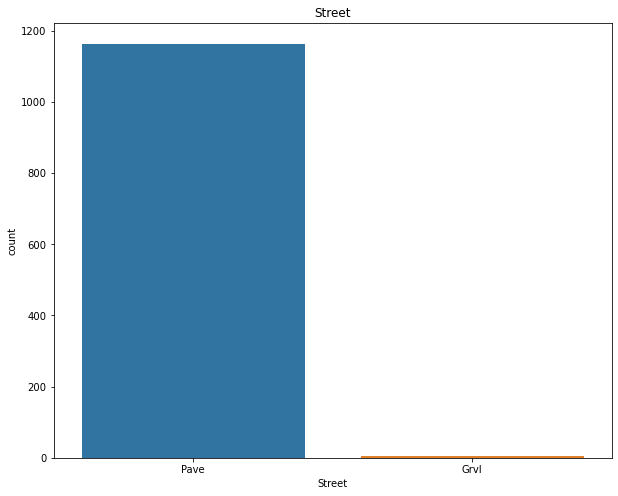

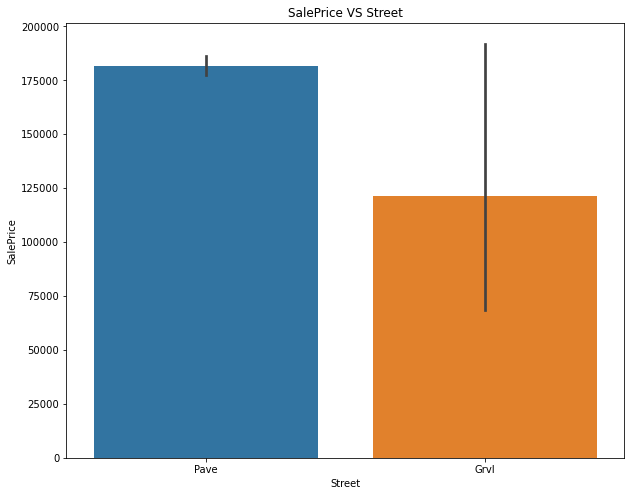

In [109]:
plot('Street', 'Street')

In [110]:
df['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

dropping this feature

In [111]:
df.drop('Street', axis = 1, inplace = True)

### Alley

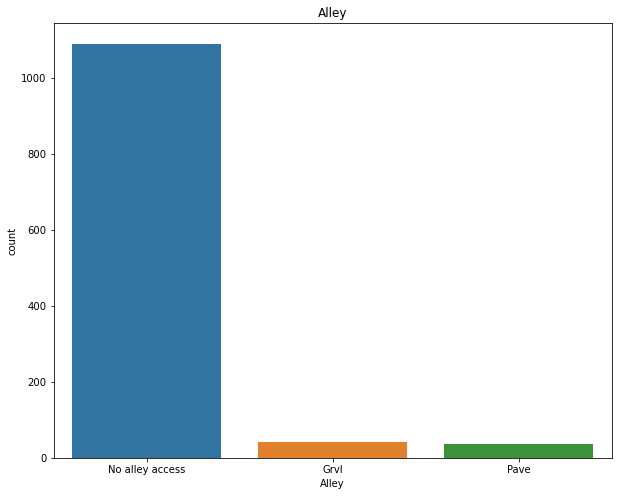

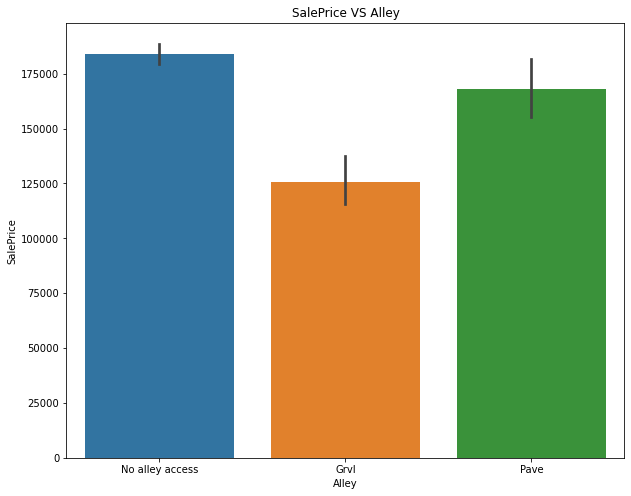

In [112]:
plot('Alley', 'Alley')

In [113]:
df['Alley'].value_counts()

No alley access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64

Dropping the feature

In [114]:
df.drop('Alley', axis = 1, inplace = True)

### LotShape

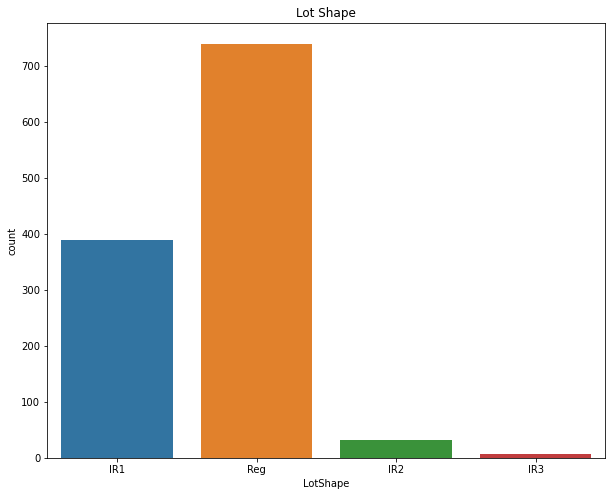

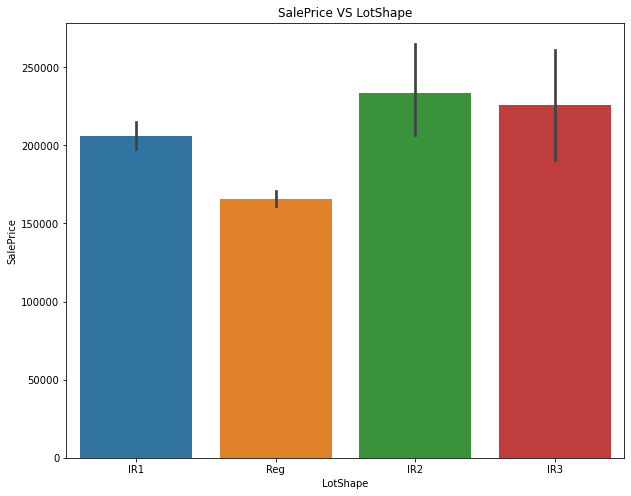

In [115]:
plot('LotShape', 'Lot Shape')

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       

Most of the houses are regularly shaped, but that has minimal effect on Sale Price, as Irregular shaped houses have more Sale Price

### LandContour

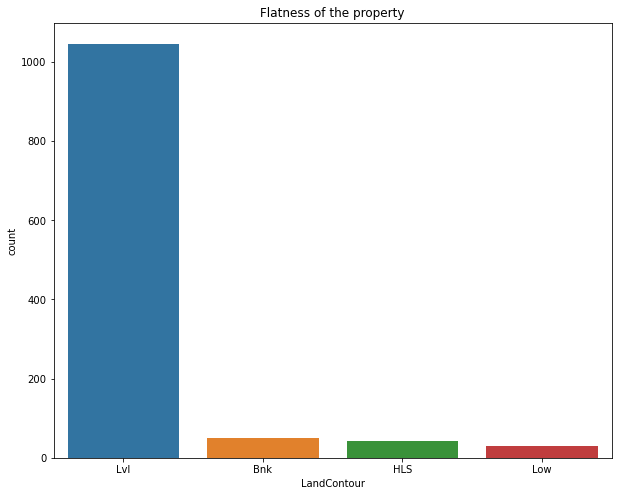

In [116]:
plot('LandContour', 'Flatness of the property')

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [117]:
df['LandContour'].value_counts()

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

Dropping the feature

In [118]:
df.drop('LandContour', axis = 1, inplace = True)

### Utilities

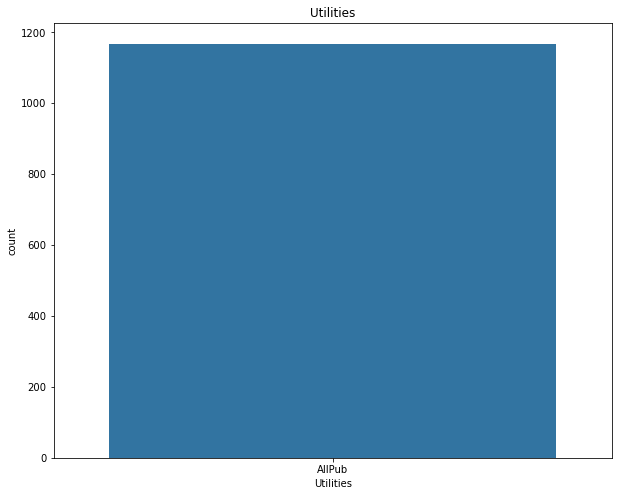

In [119]:
plot('Utilities', 'Utilities')

In [120]:
df['Utilities'].unique()

array(['AllPub'], dtype=object)

In [121]:
df.drop('Utilities', axis = 1, inplace = True)

### LotConfig

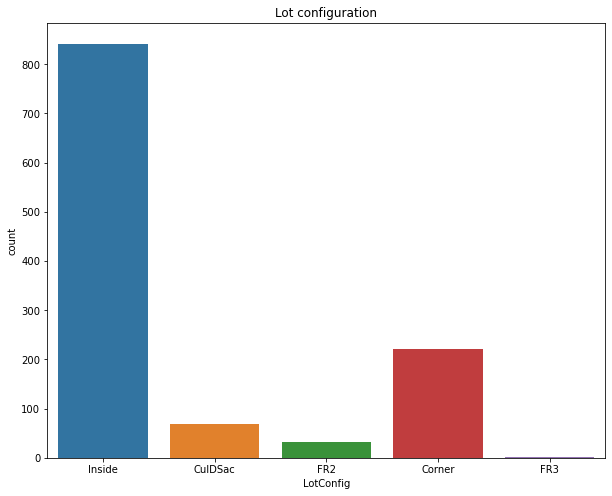

In [122]:
plot('LotConfig', 'Lot configuration')

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

Many of the houses are on the inside of the Lot. But the most Sale Price are for houses situated in Cul de Sac and Houses having frontage on 3 side of the property

### LandSlope

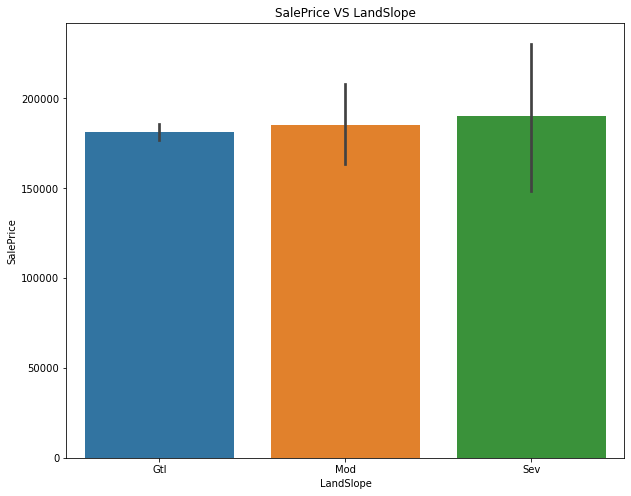

In [123]:
plot('LandSlope', 'Land Slope')

In [124]:
df['LandSlope'].value_counts()

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

Dropping the feature

In [125]:
df.drop('LandSlope', axis = 1, inplace = True)

### Neighborhood

Text(0.5, 1.0, 'SalePrice VS Neighbrhood')

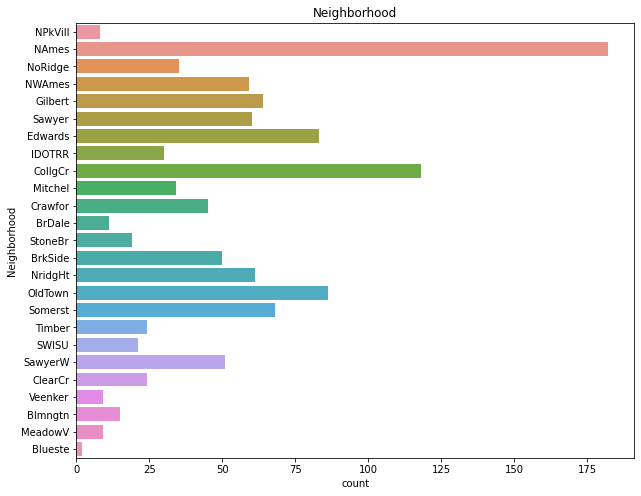

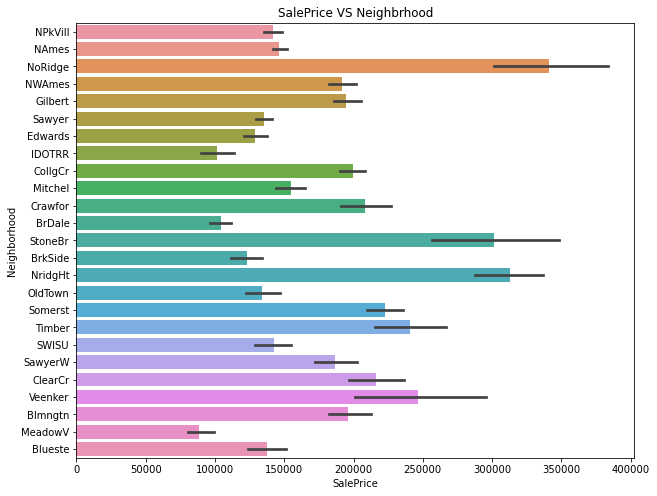

In [126]:
plt.figure(figsize = (10,8))
sns.countplot(y = df['Neighborhood'], orient = 'h')
plt.title('Neighborhood')
plt.figure(figsize = (10,8))
sns.barplot(y = df['Neighborhood'], x = df['SalePrice'], orient = 'h')
plt.title('SalePrice VS {}'.format('Neighbrhood'))

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

The most number of houses were sold in the area 'North Ames', followed by 'College Creek'

The highest sale price were for the houses sold in North Ridge, followed by Stone Brook and North Ridge Height

### Condition1

In [127]:
plot('Condition1', 'Proximity to various conditions')

In [128]:
df['Condition1'].value_counts()

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

Over 90% of the houses are normal, so we will drop the column

In [129]:
df.drop('Condition1', axis = 1, inplace = True)

### Condition2

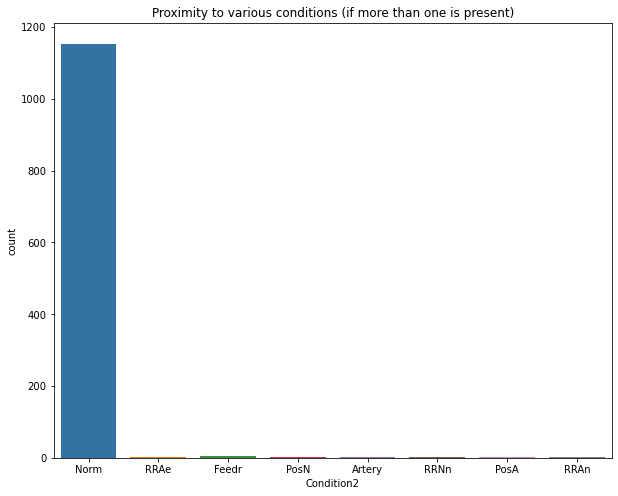

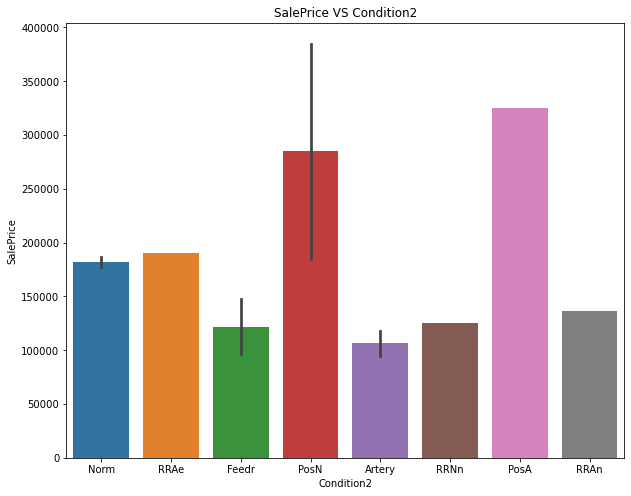

In [130]:
plot('Condition2', 'Proximity to various conditions (if more than one is present)')

In [131]:
df.drop('Condition2', axis = 1, inplace = True)

### BldgType

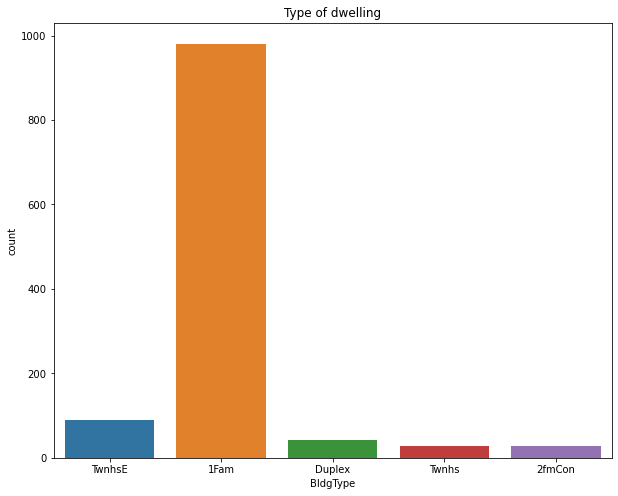

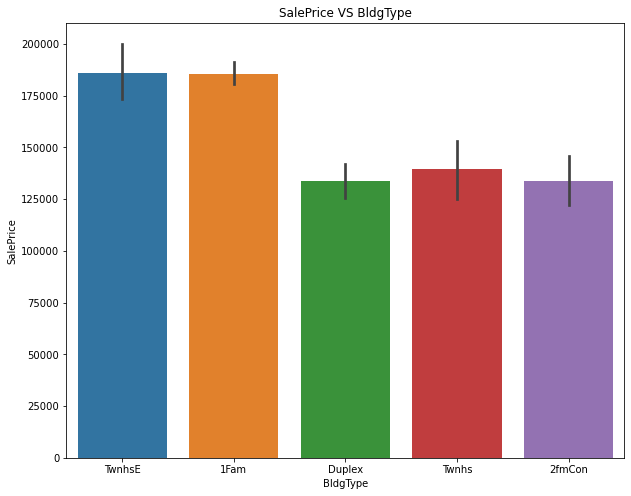

In [132]:
plot('BldgType', 'Type of dwelling')

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

So most of the houses are suitable for 1 Family homes. TownHouse inside unit also are sold more than the remaining

Also both these type of houses will fetch high Sale Price.

### HouseStyle

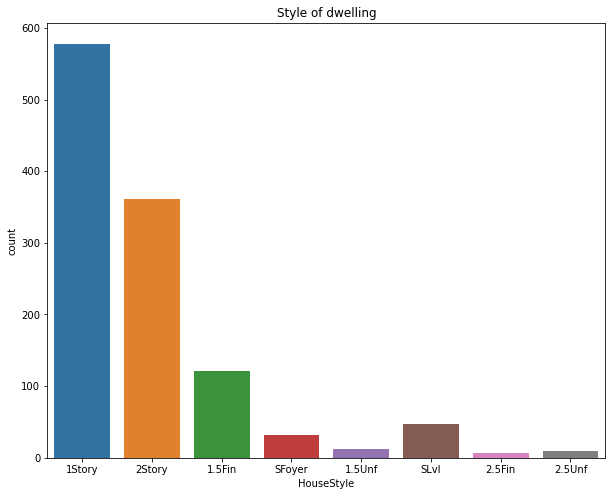

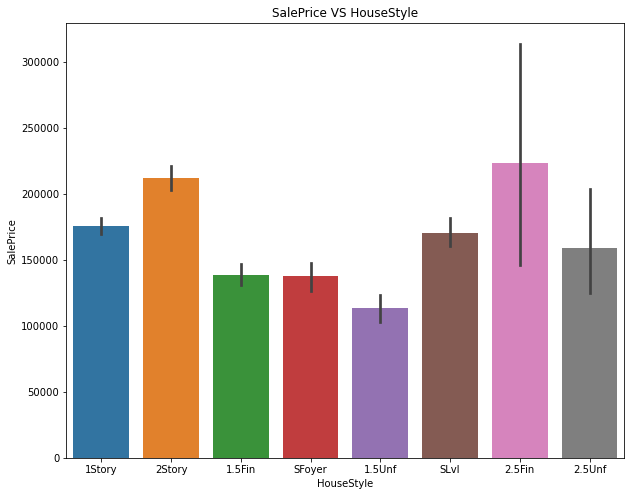

In [133]:
plot('HouseStyle', 'Style of dwelling')

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Most of the houses sold are : 1 or 2 storied, and one will get a good price for both these houses. Nut the highest Sale price is for 2 and half storied Finished House, but those are low in number

### RoofStyle

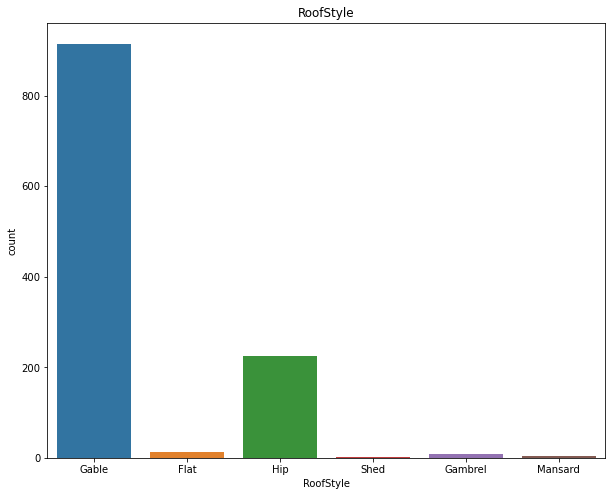

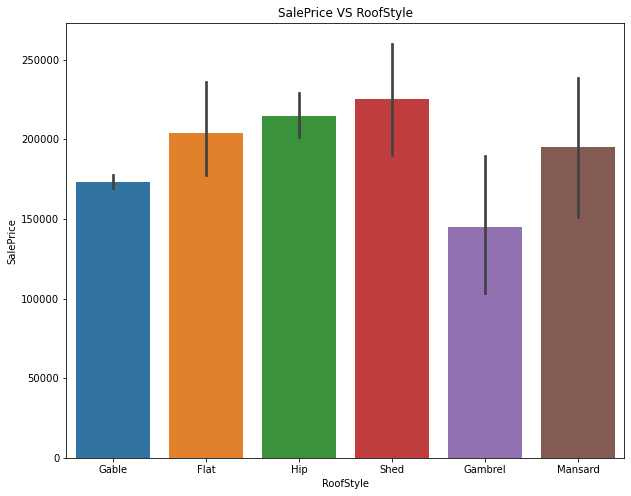

In [134]:
plot('RoofStyle', 'RoofStyle')

       Flat  	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	    Hip
       Mansard	Mansard
       Shed 	Shed

Most of the houses have Gable and Hip style roofs, and they will fetch good Sale Price

The highest Sale price is for Shed roof style

### RoofMatl

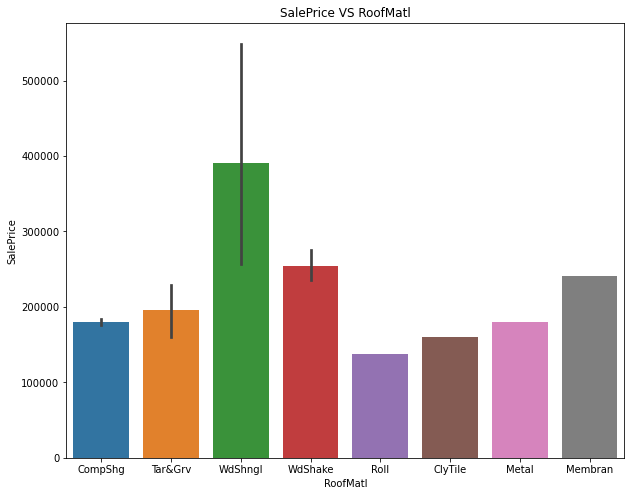

In [135]:
plot('RoofMatl', 'Roof Material')

In [136]:
df.drop('RoofMatl', axis = 1, inplace = True)

### Exterior1st

Text(0.5, 1.0, 'SalePrice VS Exterior1st')

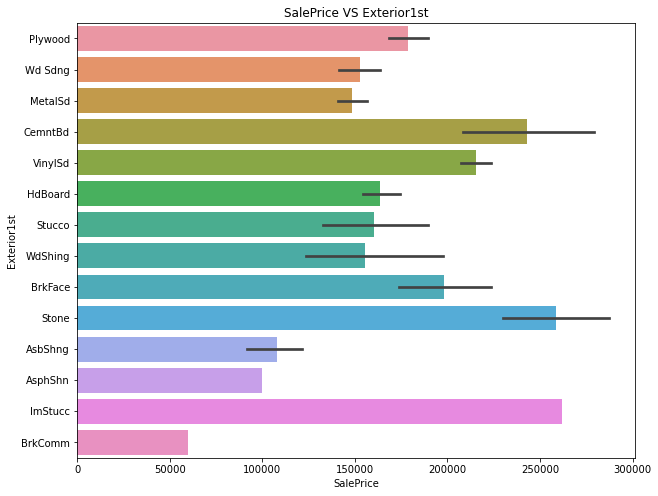

In [137]:
plt.figure(figsize = (10,8))
sns.countplot(y = df['Exterior1st'], orient = 'h')
plt.title('Exterior1st')
plt.figure(figsize = (10,8))
sns.barplot(y = df['Exterior1st'], x = df['SalePrice'], orient = 'h')
plt.title('SalePrice VS {}'.format('Exterior1st'))

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Most of the houses use vinyl siding, Hard Board, wood sdidng or Metal siding

House with Cement Board, stone, Vinyl siding and Imitation stucco will get good Sale Price

### Exterior2nd

Text(0.5, 1.0, 'SalePrice VS Exterior2nd')

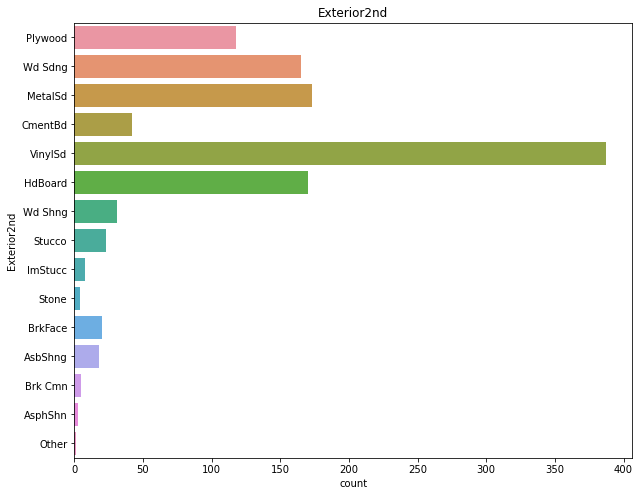

In [138]:
plt.figure(figsize = (10,8))
sns.countplot(y = df['Exterior2nd'], orient = 'h')
plt.title('Exterior2nd')
plt.figure(figsize = (10,8))
sns.barplot(y = df['Exterior2nd'], x = df['SalePrice'], orient = 'h')
plt.title('SalePrice VS {}'.format('Exterior2nd'))

You will get good price for Imitation Stucco

Similar results to that of first, with Imitation Stucco and Vinyl siding getting good Sale Price

### MasVnrType

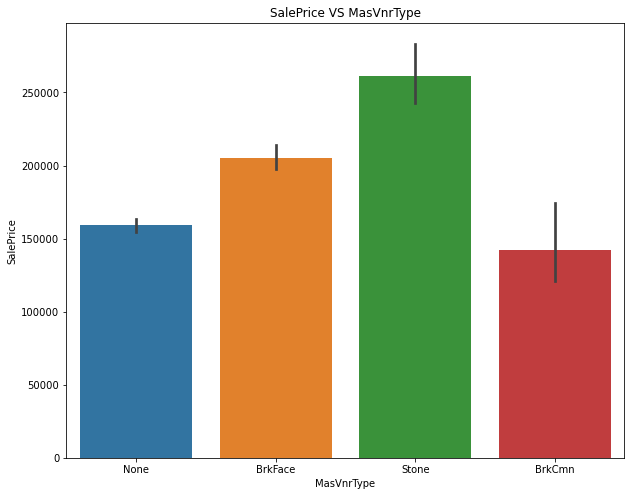

In [139]:
plot('MasVnrType', 'Masonry Veneer Type')

Stone material gets best possible sale price, and brick Common doesn't have a good Sale price

### ExterQual

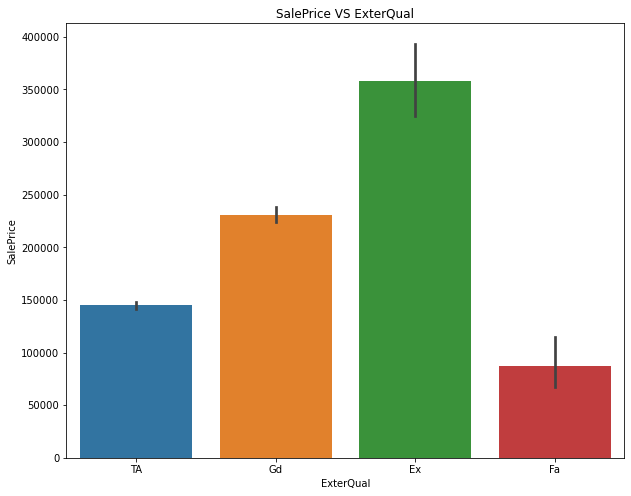

In [140]:
plot('ExterQual', ' Evaluates the quality of the material on the exterior ')

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

### ExterCond

In [141]:
plot('ExterCond', 'External material condition')

In [142]:
df['ExterCond'].value_counts()

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       

Dropping the feature

In [143]:
df.drop('ExterCond', axis = 1, inplace = True)

### Foundation

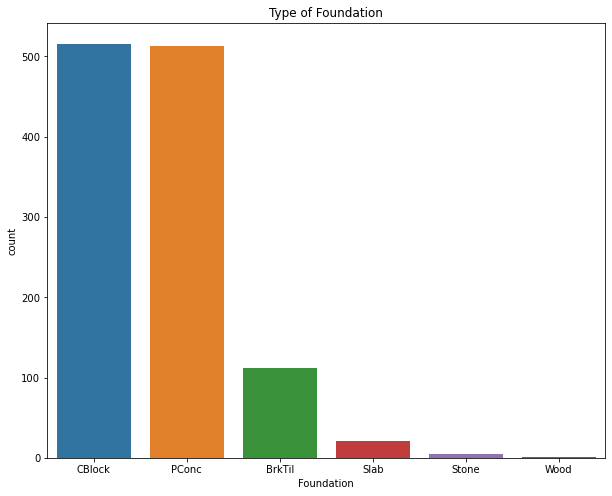

In [144]:
plot('Foundation', 'Type of Foundation')

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

So most of the houses foundations are made of: CinderBlock and poured concrete.

Having concrete foundation or stone/ Cinder block foundation will get you a good sale price

### BsmtQual

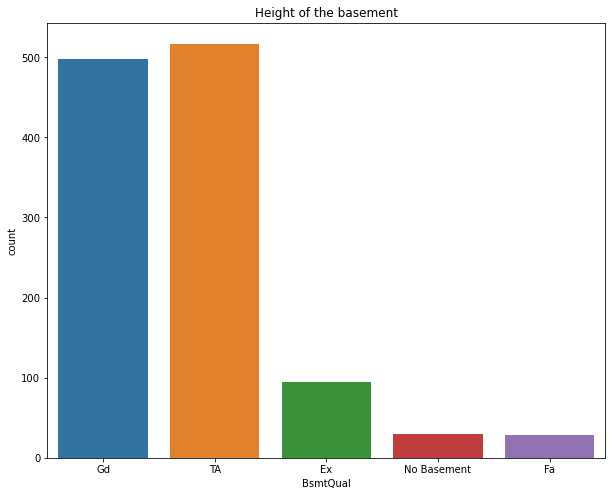

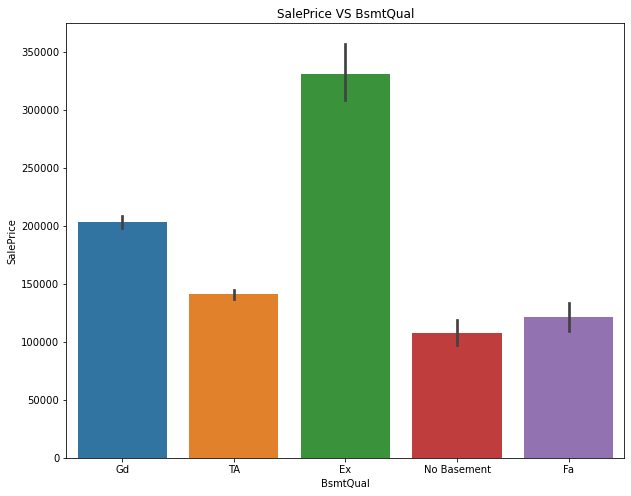

In [145]:
plot('BsmtQual', 'Height of the basement')

### BsmtCond

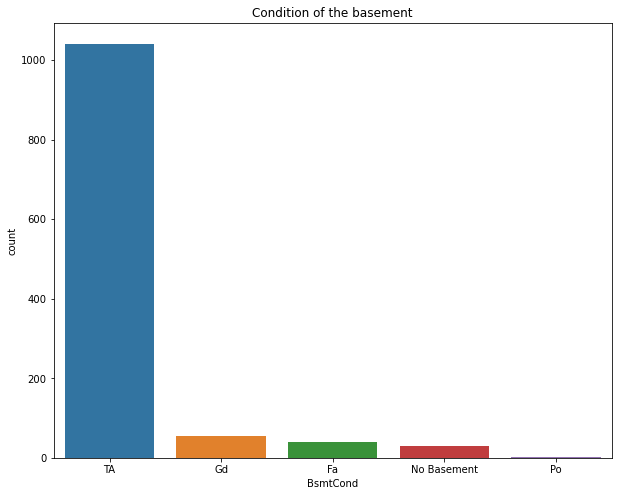

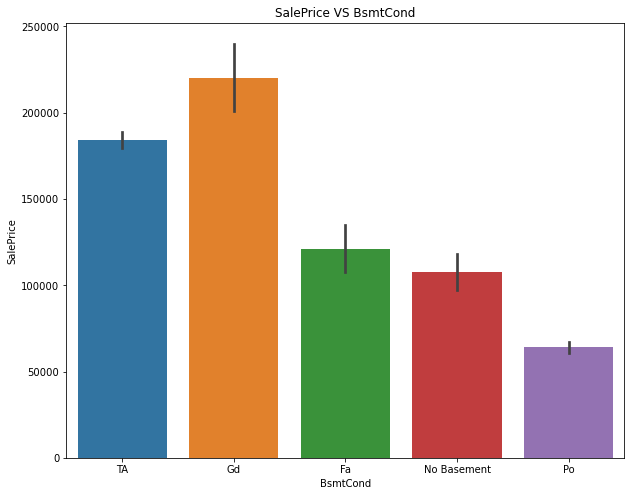

In [146]:
plot('BsmtCond', 'Condition of the basement')

In [147]:
df.drop('BsmtCond', axis = 1, inplace = True)

### BsmtExposure

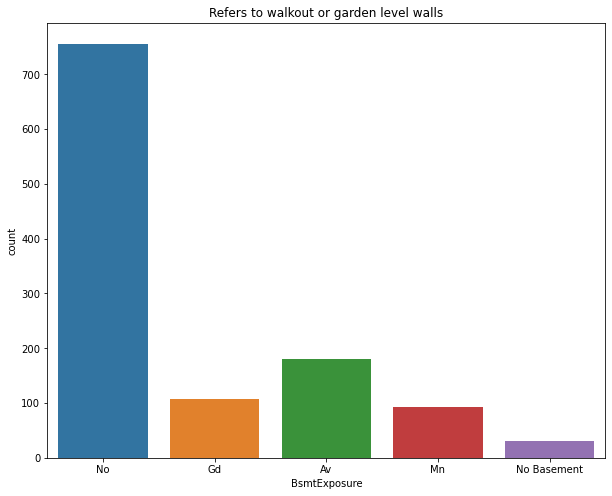

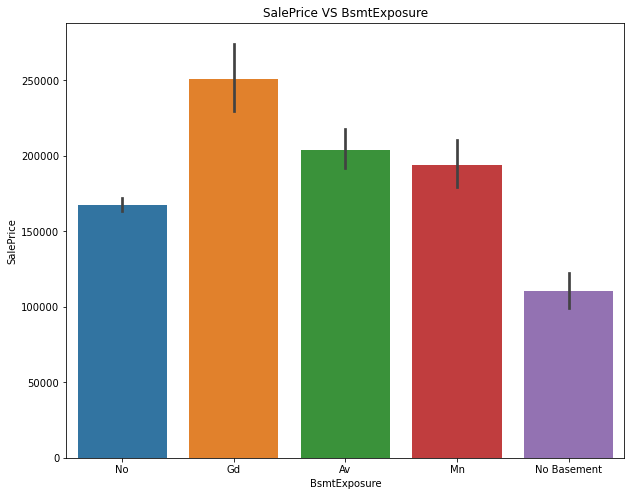

In [148]:
plot('BsmtExposure', 'Refers to walkout or garden level walls')

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

### BsmtFinType1

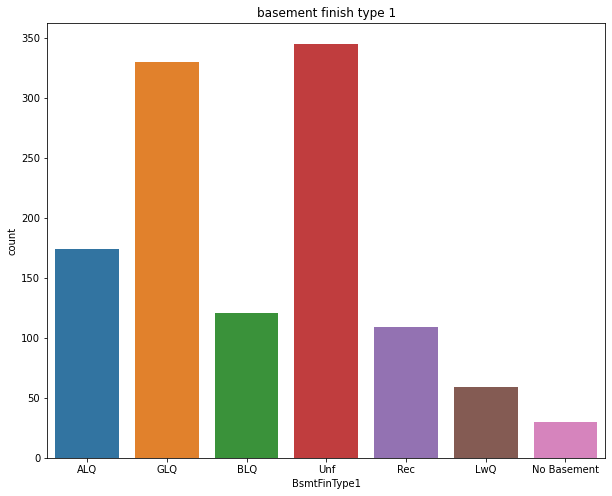

In [149]:
plot('BsmtFinType1', 'basement finish type 1')

### BsmtFinType2

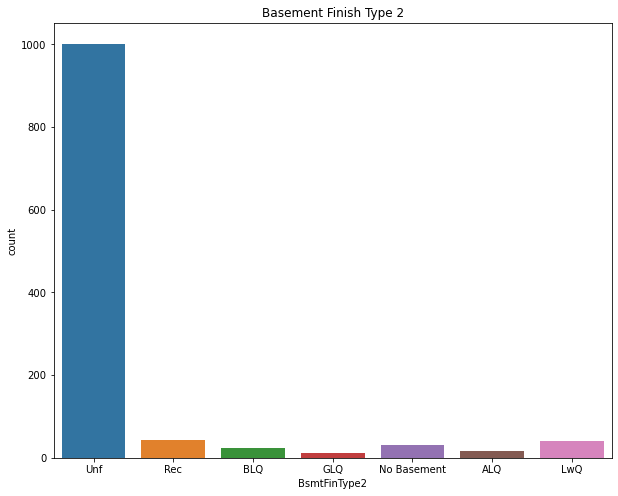

In [150]:
plot('BsmtFinType2', 'Basement Finish Type 2')

In [151]:
df.drop('BsmtFinType2', axis = 1, inplace = True)

### Heating

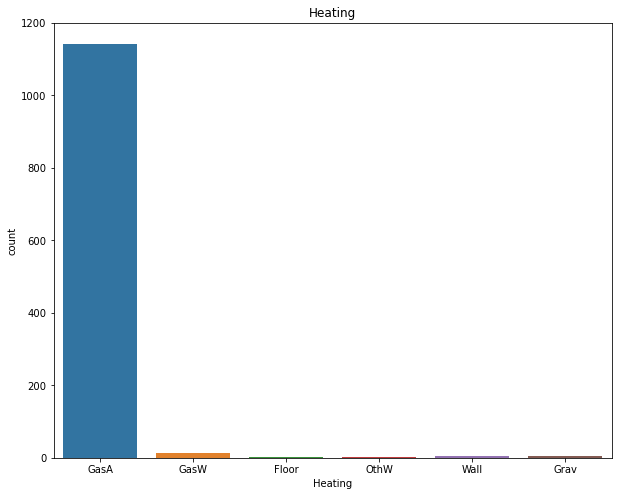

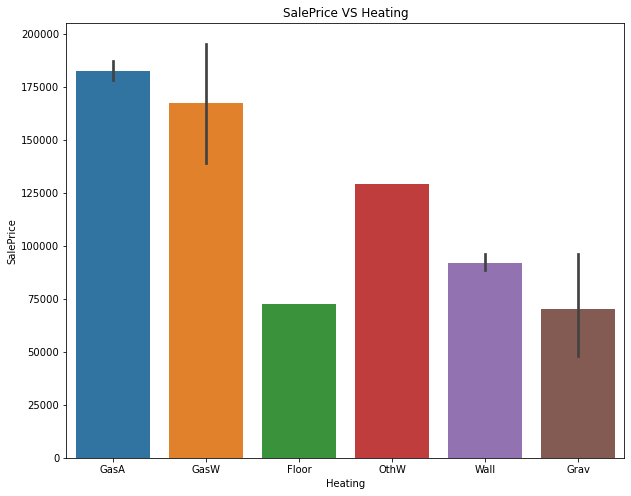

In [152]:
plot('Heating', 'Heating')

In [153]:
df.drop('Heating', axis = 1, inplace = True)

### HeatingQC

In [154]:
plot('HeatingQC', 'Heatng Quality')

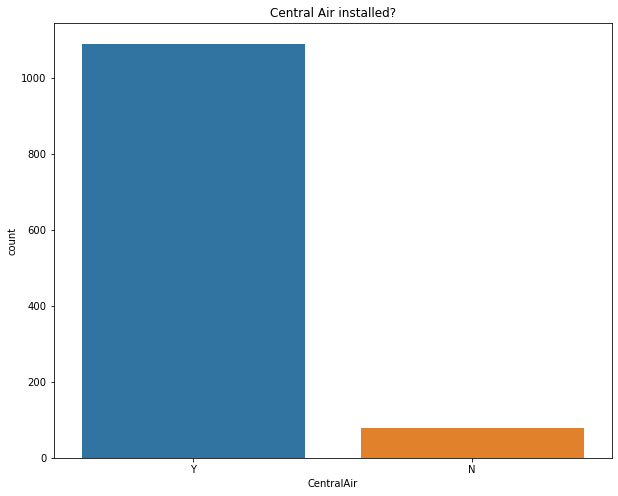

In [155]:
plot('CentralAir', 'Central Air installed?')

Even though low number of instances are available for 'N', we will keep them as the difference in Sale Price is quite significant

### Electrical

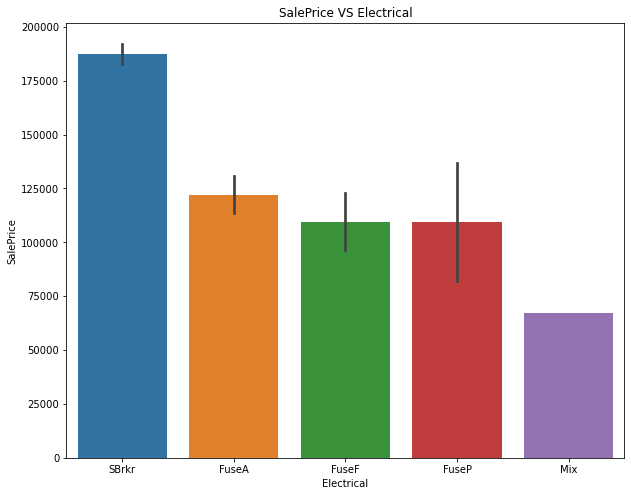

In [156]:
plot('Electrical', ' ')

We will drop this feature, as it doesn't provide the model with much predictive value

In [157]:
df.drop('Electrical', axis = 1, inplace = True)

### KitchenQual

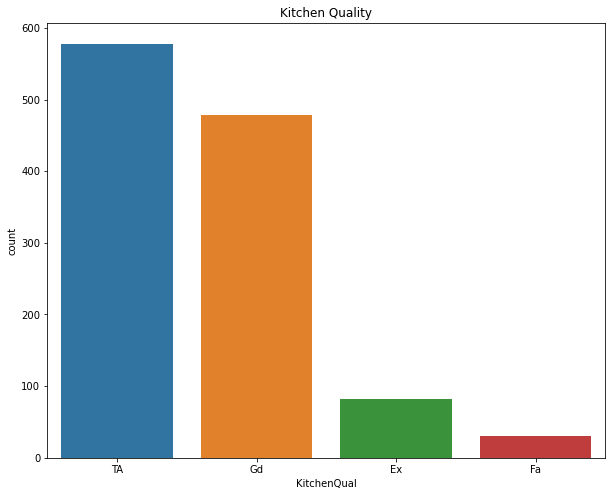

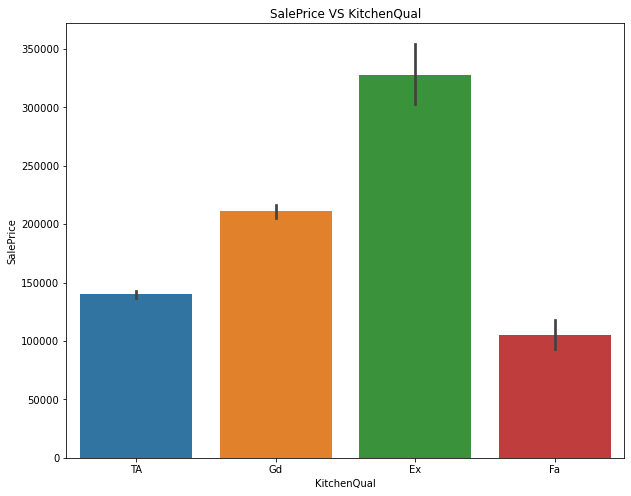

In [158]:
plot('KitchenQual', 'Kitchen Quality')

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	

Most of the houses have Typical kitchens, and have low Sales Price than Good and excellent kitchens

### Functional

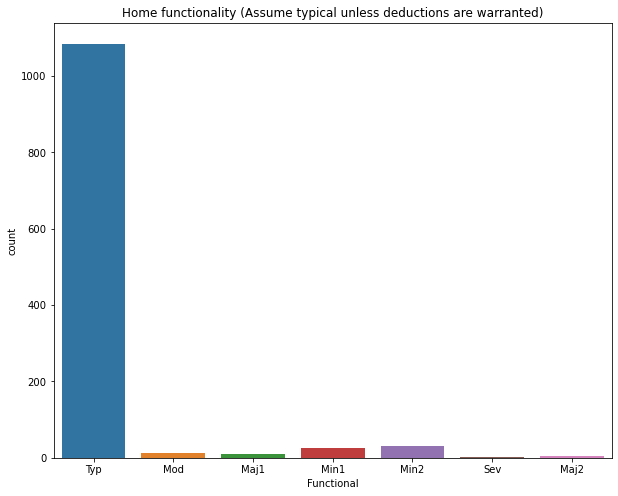

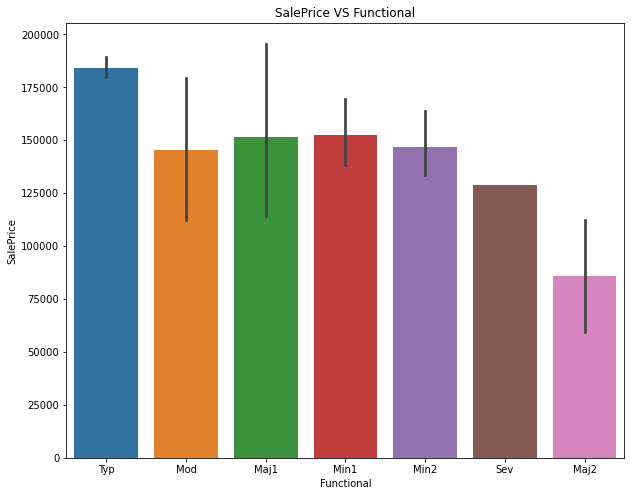

In [159]:
plot('Functional', 'Home functionality (Assume typical unless deductions are warranted)')

Most of the values are 'Typical' in this feature. But the feature doesn't seem to offer any predicting value

In [160]:
df.drop('Functional', axis = 1, inplace = True)

### GarageFinish

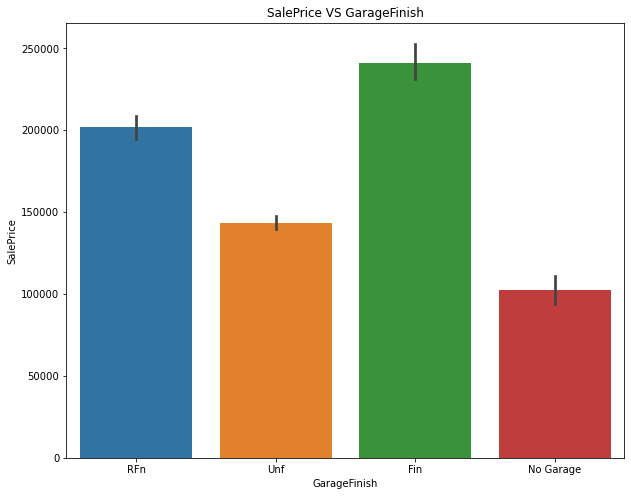

In [161]:
plot('GarageFinish', 'Garage Finish')

Around 500 houses Have unfinished Garages, which reduce the House price, but buying a house without a garage gets you the lowest price

### GarageCars

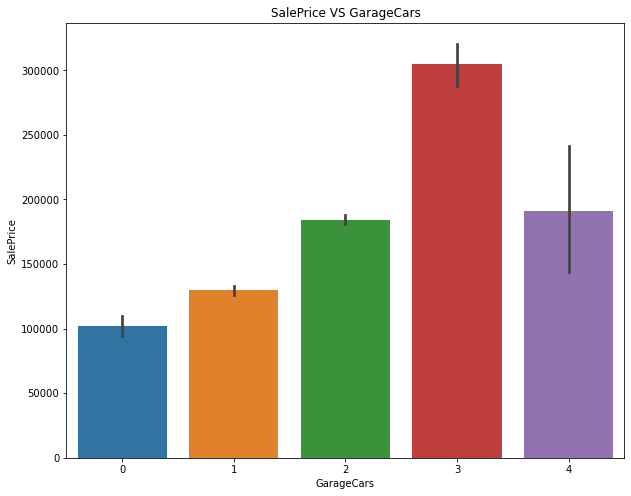

In [162]:
plot('GarageCars', 'No of Cars in Garage')

So a garage having space for 3 cars gets the best price, followed by houses with 2 or 4 car parking space

### GarageQual

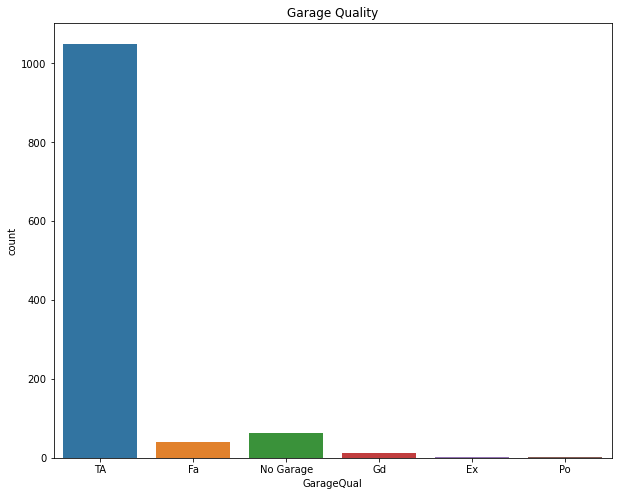

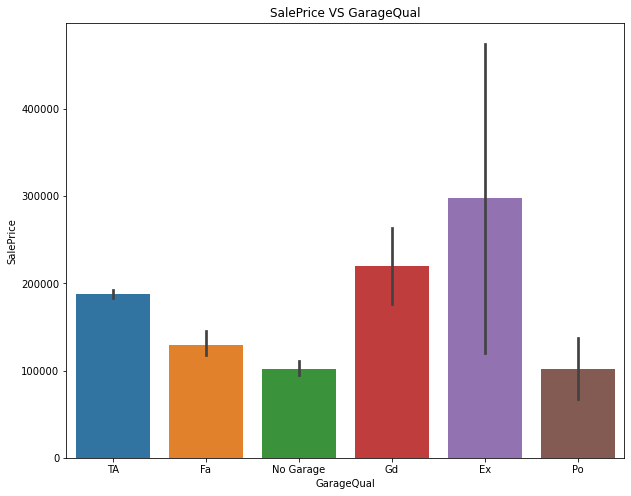

In [163]:
plot('GarageQual', 'Garage Quality')

dropping this column

In [164]:
df.drop('GarageQual', axis = 1, inplace = True)

### GarageCond

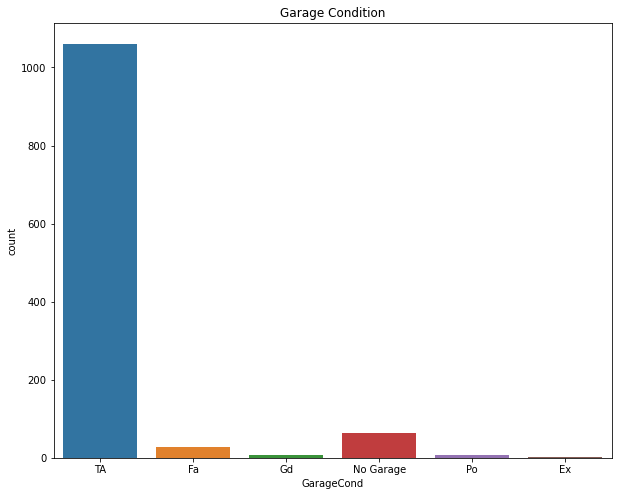

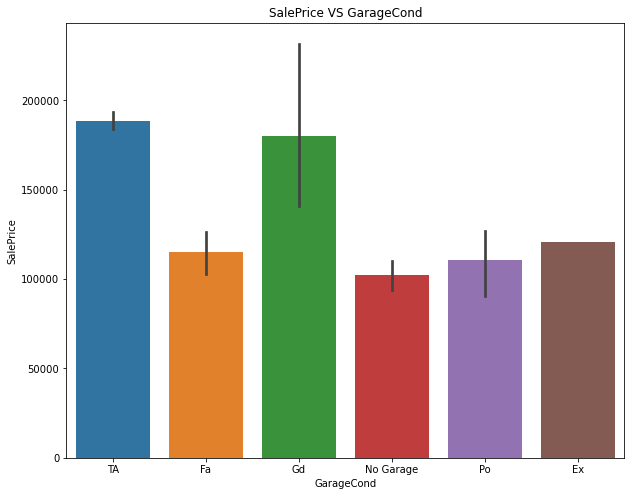

In [165]:
plot('GarageCond', 'Garage Condition')

In [166]:
df.drop('GarageCond', axis = 1, inplace = True)

### PavedDrive

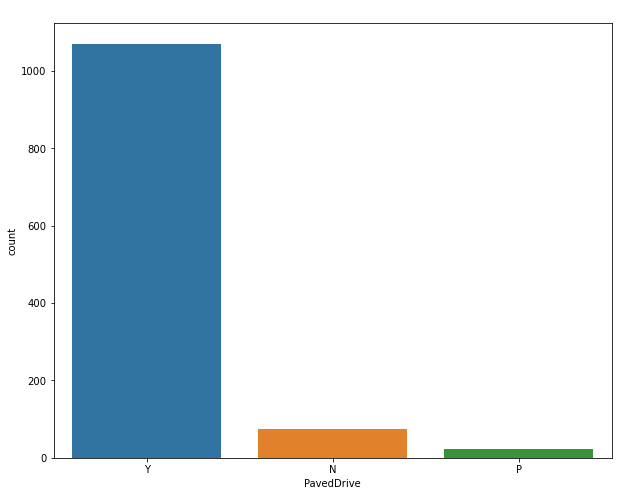

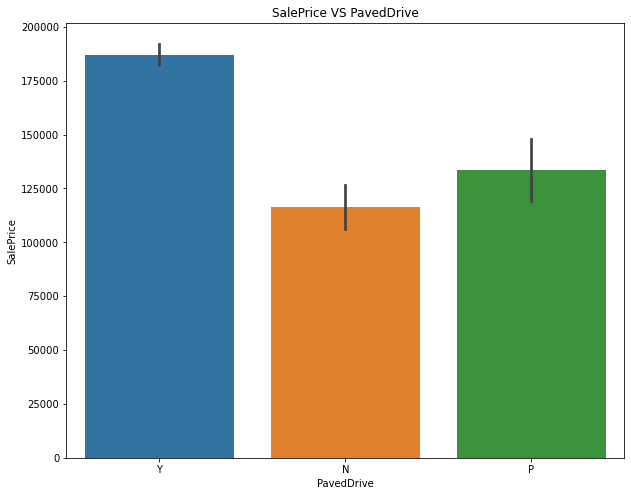

In [167]:
plot('PavedDrive', ' ')

In [168]:
df.drop('PavedDrive', axis = 1, inplace = True)

### PoolQC

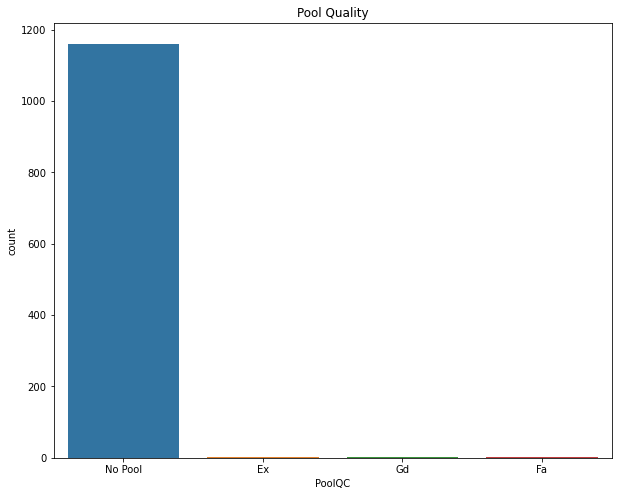

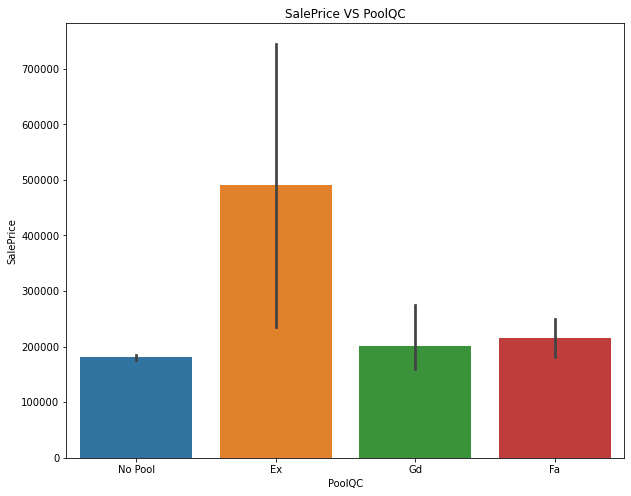

In [169]:
plot('PoolQC', 'Pool Quality')

In [170]:
df.drop('PoolQC', axis = 1, inplace = True)

### Fence

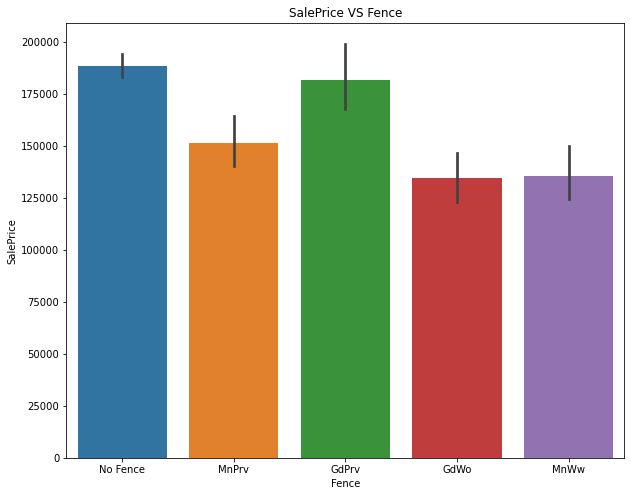

In [171]:
plot('Fence', 'Fence')

Most of the houses don't have fence, and the difference in prices for house with fence and house w/o fence is minor

### MiscFeature

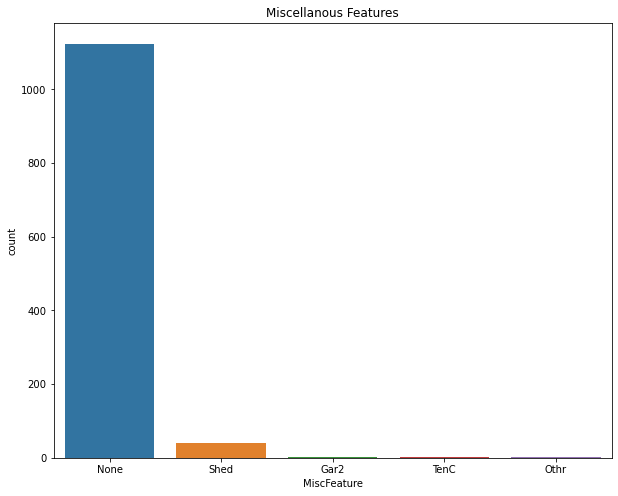

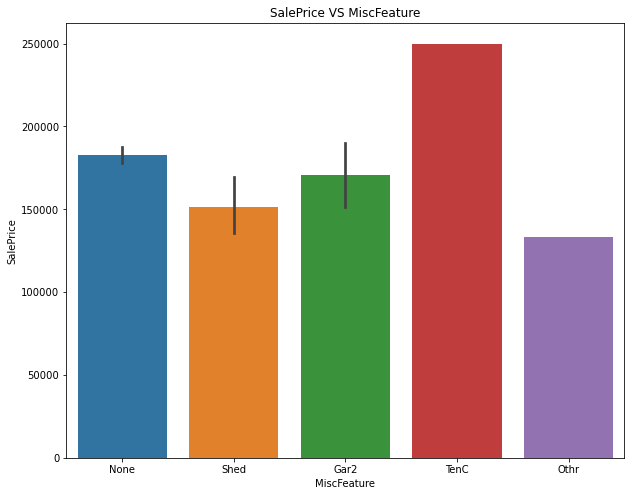

In [172]:
plot('MiscFeature', 'Miscellanous Features')

In [173]:
df.drop('MiscFeature', axis =1, inplace = True)

### SaleType

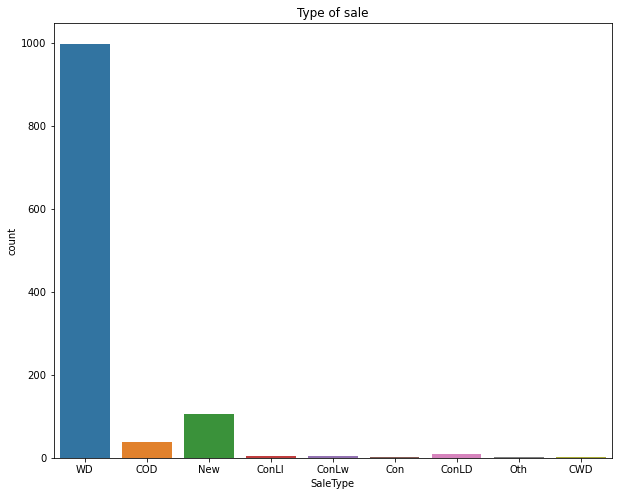

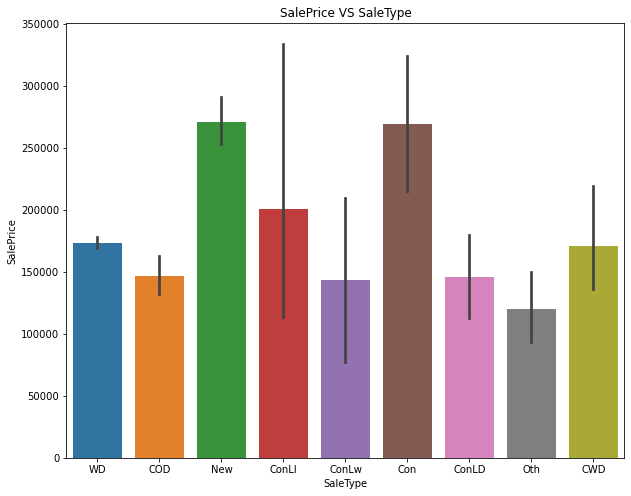

In [174]:
plot('SaleType', 'Type of sale')

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

Most of the houses were brought on Warranty Deed - Conventional

New houses just constructed and sold get the best price/ have higher Sale Price.

### SaleCondition

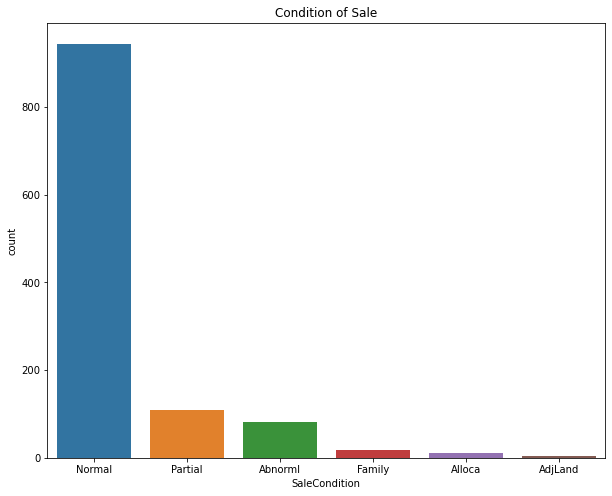

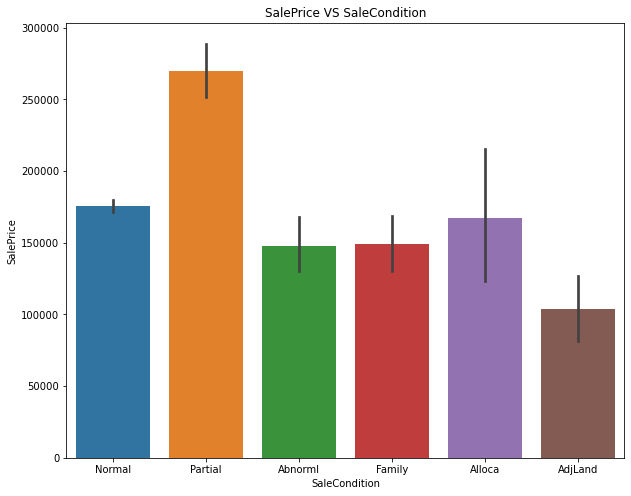

In [175]:
plot('SaleCondition', 'Condition of Sale')

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

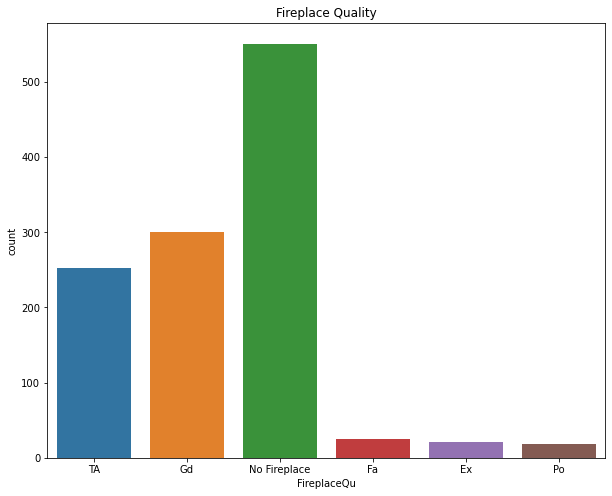

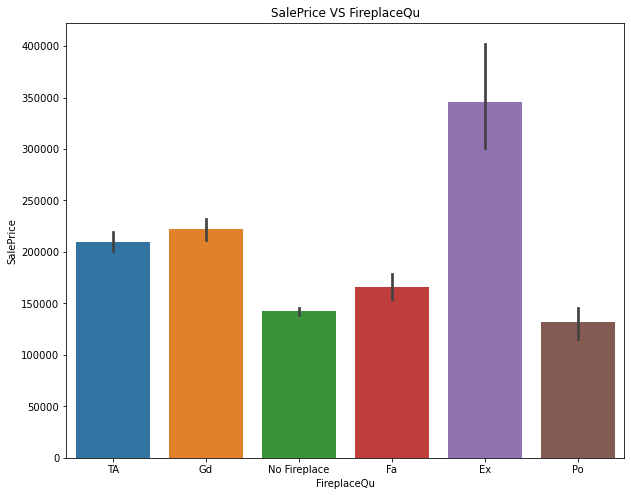

In [176]:
plot('FireplaceQu', 'Fireplace Quality')

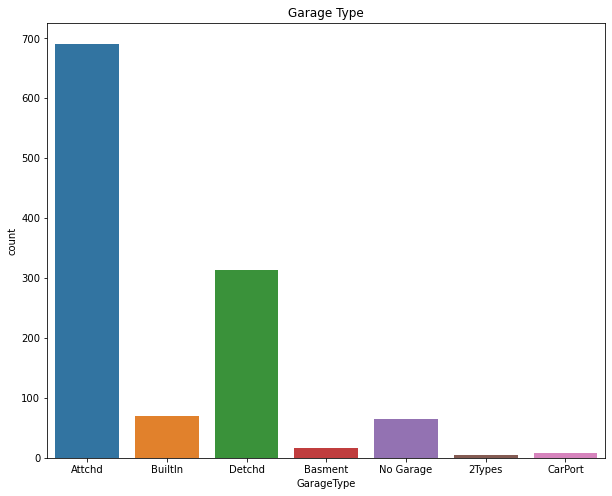

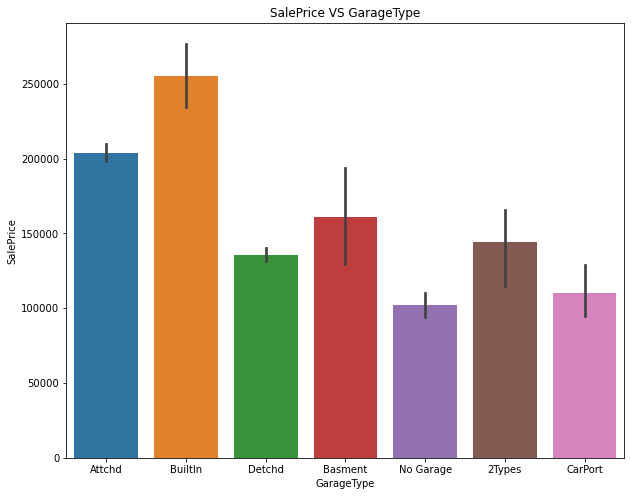

In [177]:
plot('GarageType', 'Garage Type')

EDA Done

In [178]:
df.shape

(1168, 52)

So we have dropped 28 features which didn't provide any predictive value to the model

After EDA we will do Data Pre-processing

# Data Preprocessing

## Categorical Variables: One hot encoding.

### Ordinal

In [179]:
ordinal = df[['OverallQual', 'OverallCond', 'BedroomAbvGr', 'BsmtFullBath'
              , 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',  'BsmtQual', 'ExterQual'
              , 'HeatingQC', 'KitchenQual',  'GarageCars']]

In [180]:
ordinal

OverallQual  OverallCond  BedroomAbvGr  BsmtFullBath  FullBath  \
0               6            5             2             0         2   
1               8            6             4             1         2   
2               7            5             3             1         2   
3               6            6             3             0         2   
4               6            7             3             0         2   
...           ...          ...           ...           ...       ...   
1163            5            5             3             0         1   
1164            4            5             2             0         2   
1165            6            6             3             0         2   
1166            4            4             3             0         1   
1167            6            5             3             1         2   

      HalfBath  TotRmsAbvGrd  Fireplaces  GarageCars     BsmtQual ExterQual  \
0            0             5           1           2           Gd        TA   
1            0             8           1           2           TA        Gd   
2            1             8           1           2           Gd        Gd   
3            0             7           1           2           Gd        TA   
4            0             8           1           2           Gd        Gd   
...        ...           ...         ...         ...          ...       ...   
1163         0             5           0           1           TA        TA   
1164         0             5           0           2  No Basement        TA   
1165         1             7           1           2           Gd        TA   
1166         0             6           0           1           TA        TA   
1167         1             7           1           2           Gd        Gd   

     HeatingQC KitchenQual  GarageCars  
0           TA          TA           2  
1           Ex          Gd           2  
2           Ex          TA           2  
3           Ex          TA           2  
4           Gd          Gd           2  
...        ...         ...         ...  
1163        TA          TA           1  
1164        Ex          Gd           2  
1165        TA          TA           2  
1166        TA          TA           1  
1167        Ex          Gd           2  

[1168 rows x 14 columns]

In a few ordinal variables, we have to map 
       
       Ex	Excellent                - 5
       Gd	Good                     - 4
       TA	Typical/Average          - 3
       Fa	Fair                     - 2
       Po	Poor                     - 1

       
       

In [181]:
ordinal['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'No Basement', 'Fa'], dtype=object)

In [182]:
mapdict = {
           'No Basement' : 0,
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
}
df['BsmtQual'] = df['BsmtQual'].map(mapdict)

In [183]:
ordinal['ExterQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [184]:
mapdict = {
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
}
df['ExterQual'] = df['ExterQual'].map(mapdict)

In [185]:
df['HeatingQC'].unique()

array(['TA', 'Ex', 'Gd', 'Fa', 'Po'], dtype=object)

In [186]:
mapdict = {
           'Po' : 0,
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
}
df['HeatingQC'] = df['HeatingQC'].map(mapdict)

In [187]:
df['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [188]:
mapdict = {
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
}
df['KitchenQual'] = df['KitchenQual'].map(mapdict)

In [189]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn', 'No Basement'], dtype=object)

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [190]:
mapdict = {
           'No Basement': 0,
           'No': 0,
           'Mn': 1,
           'Av' : 2,
           'Gd' : 3,
}
df['BsmtExposure'] = df['BsmtExposure'].map(mapdict)

In [191]:
df['FireplaceQu'].unique()

array(['TA', 'Gd', 'No Fireplace', 'Fa', 'Ex', 'Po'], dtype=object)

In [192]:
mapdict = {
           'No Fireplace': 0,
           'Po': 0,
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
}
df['FireplaceQu'] = df['FireplaceQu'].map(mapdict)

### Nominal

In [193]:
nominal = df[['MoSold', 'YrSold', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 
              'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'CentralAir',
              'Foundation', 'BsmtFinType1', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition', 'GarageType']]

In [194]:
nominal

MoSold  YrSold MSZoning LotShape LotConfig Neighborhood BldgType  \
0          2    2007       RL      IR1    Inside      NPkVill   TwnhsE   
1         10    2007       RL      IR1    Inside        NAmes     1Fam   
2          6    2007       RL      IR1   CulDSac      NoRidge     1Fam   
3          1    2010       RL      IR1    Inside       NWAmes     1Fam   
4          6    2009       RL      IR1       FR2       NWAmes     1Fam   
...      ...     ...      ...      ...       ...          ...      ...   
1163       2    2010       RL      IR1    Inside       Sawyer     1Fam   
1164       5    2009       RL      Reg    Inside      Edwards     1Fam   
1165       7    2009       RL      Reg       FR2      NPkVill    Twnhs   
1166       7    2008  C (all)      Reg    Inside       IDOTRR     1Fam   
1167       6    2006       RL      IR1    Inside      Gilbert     1Fam   

     HouseStyle RoofStyle Exterior1st Exterior2nd MasVnrType CentralAir  \
0        1Story     Gable     Plywood     Plywood       None          Y   
1        1Story      Flat     Wd Sdng     Wd Sdng       None          Y   
2        2Story     Gable     MetalSd     MetalSd       None          Y   
3        1Story       Hip     Plywood     Plywood    BrkFace          Y   
4        1Story     Gable     CemntBd     CmentBd      Stone          Y   
...         ...       ...         ...         ...        ...        ...   
1163     1Story     Gable     MetalSd     MetalSd    BrkFace          Y   
1164     1Story     Gable     VinylSd     VinylSd       None          Y   
1165     2Story     Gable     Plywood     Brk Cmn       None          Y   
1166     2Story   Gambrel     BrkFace     BrkFace       None          N   
1167     2Story     Gable     VinylSd     VinylSd       None          Y   

     Foundation BsmtFinType1 GarageFinish     Fence SaleType SaleCondition  \
0        CBlock          ALQ          RFn  No Fence       WD        Normal   
1         PConc          ALQ          Unf  No Fence       WD        Normal   
2         PConc          GLQ          Unf  No Fence       WD        Normal   
3        CBlock          BLQ          RFn     MnPrv      COD        Normal   
4        CBlock          ALQ          Fin  No Fence       WD        Normal   
...         ...          ...          ...       ...      ...           ...   
1163     CBlock          BLQ          Unf     MnPrv       WD        Normal   
1164     CBlock  No Basement          Fin     MnPrv       WD        Normal   
1165     CBlock          ALQ          Unf  No Fence       WD        Normal   
1166     BrkTil          Unf          Unf     MnPrv       WD        Normal   
1167      PConc          GLQ          Fin  No Fence       WD        Normal   

     GarageType  
0        Attchd  
1        Attchd  
2        Attchd  
3        Attchd  
4        Attchd  
...         ...  
1163     Detchd  
1164     Detchd  
1165     Attchd  
1166     Detchd  
1167     Attchd  

[1168 rows x 20 columns]

In [195]:
n = 0
for i in nominal.columns:
    n = n+1
print(n)

20


The Following features have too many variables, and some of the variables have low representation in our data.
So we will leave top 5 groups in the nominal variable as they are and combine the rest of the groups under one term : 'other_featurename'

The foll features have more than 6 groups in them:

MoSold, Neighborhood, HouseStyle, Exterior1st, Exterior2nd, BsmtFinType1, SaleType

In [196]:
df['MoSold'].value_counts()

6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64

In [197]:
def mosold(row):
    if row['MoSold'] in [6,7,5,4,8]:
        return row
    else:
        row['MoSold'] = 'other_mosold'
        return row
df = df.apply(mosold, axis = 1)

In [198]:
df['Neighborhood'].value_counts()

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [199]:
def neighborhood(row):
    if row['Neighborhood'] in ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst']:
        return row
    else:
        row['Neighborhood'] = 'other_neighborhood'
        return row
df = df.apply(neighborhood, axis = 1)

In [200]:
df['HouseStyle'].value_counts()

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [201]:
def housestyle(row):
    if row['HouseStyle'] in ['1Story', '2Story', '1.5Fin']:
        return row
    else:
        row['HouseStyle'] = 'other_HouseStyle'
        return row
df = df.apply(housestyle, axis =1)

In [202]:
df['Exterior1st'].value_counts()

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
AsbShng     19
WdShing     19
Stone        2
ImStucc      1
AsphShn      1
BrkComm      1
Name: Exterior1st, dtype: int64

In [203]:
def Exterior1st(row):
    if row['Exterior1st'] in ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng']:
        return row
    else:
        row['Exterior1st'] = 'other_Exterior1st'
        return row
df = df.apply(Exterior1st, axis =1)

In [204]:
df['Exterior2nd'].value_counts()

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64

In [205]:
def Exterior2nd(row):
    if row['Exterior2nd'] in ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng']:
        return row
    else:
        row['Exterior2nd'] = 'other_Exterior2nd'
        return row
df = df.apply(Exterior2nd, axis =1)

In [206]:
df['BsmtFinType1'].value_counts()

Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No Basement     30
Name: BsmtFinType1, dtype: int64

In [207]:
def BsmtFinType1(row):
    if row['BsmtFinType1'] in ['Unf', 'GLQ', 'ALQ']:
        return row
    else:
        row['BsmtFinType1'] = 'other_BsmtFinType1'
        return row
df = df.apply(BsmtFinType1, axis =1)

In [208]:
df['SaleType'].value_counts()

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64

In [209]:
def SaleType(row):
    if row['SaleType'] in ['WD', 'New']:
        return row
    else:
        row['SaleType'] = 'other_SaleType'
        return row
df = df.apply(SaleType, axis =1)

In [210]:
df['GarageType'].value_counts()

Attchd       691
Detchd       314
BuiltIn       70
No Garage     64
Basment       16
CarPort        8
2Types         5
Name: GarageType, dtype: int64

In [211]:
def GarageType(row):
    if row['GarageType'] in ['Attchd', 'Detchd']:
        return row
    else:
        row['GarageType'] = 'other_GarageType'
        return row
df = df.apply(GarageType, axis = 1)

In [212]:
def dummies(column):
    global df
    print(df.shape)
    dums = pd.get_dummies(df[column], drop_first = True)
    df.drop(column, axis = 1, inplace = True)
    df = pd.concat([df, dums], axis = 1)
    print(df.shape)

In [213]:
for i in nominal.columns:
    dummies(i)

(1168, 52)
(1168, 56)
(1168, 56)
(1168, 59)
(1168, 59)
(1168, 62)
(1168, 62)
(1168, 64)
(1168, 64)
(1168, 67)
(1168, 67)
(1168, 71)
(1168, 71)
(1168, 74)
(1168, 74)
(1168, 76)
(1168, 76)
(1168, 80)
(1168, 80)
(1168, 83)
(1168, 83)
(1168, 86)
(1168, 86)
(1168, 88)
(1168, 88)
(1168, 88)
(1168, 88)
(1168, 92)
(1168, 92)
(1168, 94)
(1168, 94)
(1168, 96)
(1168, 96)
(1168, 99)
(1168, 99)
(1168, 100)
(1168, 100)
(1168, 104)
(1168, 104)
(1168, 105)


In [214]:
df_list = [x for x in df.columns]
df.drop(['RH', 'Shed', 'No Garage', 'No Fence', 'AdjLand', 'Alloca'], axis = 1, inplace = True)

### Numeric Variable

we will first normalize he variables and then scale them by using Robust Scaler. We will use robust scaler as we haven't removed the outliers

First lets divide the data using train_test_split

In [215]:
from sklearn.model_selection import train_test_split
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [216]:
X_train,X_test,y_train, y_test = train_test_split(X,y, random_state = 0)

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [218]:
df.shape

(1168, 99)

In [219]:
df.isnull().sum().head(40)

MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
BsmtQual        0
BsmtExposure    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
SalePrice       0
5               0
6               0
7               0
8               0
other_mosold    0
2007            0
2008            0
2009            0
dtype: int64

In [220]:
columns = df.columns.to_list()

# Model Training

### Linear Regression

In [221]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_sc, y_train)
y_pred = linreg.predict(X_test_sc)
print(r2_score(y_test, y_pred))
print(sqrt(mean_squared_error(y_test, y_pred)))

0.759290255960342
39757.760668651164


The r2 score we are getting is good, but still we will try to improve this score.

### Ridge

In [222]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_sc,y_train)
y_pred = ridge.predict(X_test_sc)
print(r2_score(y_test, y_pred))
print(sqrt(mean_squared_error(y_test, y_pred)))

0.7622581547685009
39511.89818795456


### Lasso

In [223]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 1000000).fit(X_train_sc,y_train)
y_pred = lasso.predict(X_test_sc)
print(r2_score(y_test, y_pred))
print(sqrt(mean_squared_error(y_test, y_pred)))

0.7593389323475941
39753.74055303515


### KNeighbor Regression

In [224]:
from sklearn.neighbors import KNeighborsRegressor

max_score = 0
for i in range(1, 50, 2):
    knr = KNeighborsRegressor(n_neighbors = i).fit(X_train_sc,y_train)
    y_pred = knr.predict(X_test_sc)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    if r2>max_score:
        max_score = r2
        neighbors = i
        rmse_final = rmse
print("Max r2 score = {} for k = {}".format(max_score, neighbors))
print('RMSE = {}'.format(rmse_final))

Max r2 score = 0.7603766101198379 for k = 3
RMSE = 39667.94326060574


### Decision Tree Regression

In [225]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 4).fit(X_train_sc, y_train)
y_pred = dtr.predict(X_test_sc)
print(r2_score(y_test, y_pred))
print(sqrt(mean_squared_error(y_test, y_pred)))

0.6588580492148183
47330.6690784216


### Baggingregressor

In [227]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(n_estimators = 1000).fit(X_train_sc, y_train)
y_pred = br.predict(X_test_sc)
print(r2_score(y_test, y_pred))
print(sqrt(mean_squared_error(y_test, y_pred)))

0.8502561538803607
31358.087768584523


### XGboost Regressor

In [228]:
from xgboost import XGBRegressor
xgbr = XGBRegressor().fit(X_train_sc, y_train)
y_pred = xgbr.predict(X_test_sc)
print(xgbr.score(X_test_sc, y_test))
print(sqrt(mean_squared_error(y_test, y_pred)))

0.8930609413116264
26499.840380078527


###  Test Data Set

In [229]:
def ordinal_transformer():
    global df
    mapdict = {
           'No Basement' : 0,
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
    }
    df['BsmtQual'] = df['BsmtQual'].map(mapdict)
    mapdict = {
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
    }
    df['ExterQual'] = df['ExterQual'].map(mapdict)
    mapdict = {
           'Po' : 0,
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
    }
    df['HeatingQC'] = df['HeatingQC'].map(mapdict)
    mapdict = {
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
    }
    df['KitchenQual'] = df['KitchenQual'].map(mapdict)
    mapdict = {
           'No Basement': 0,
           'No': 0,
           'Mn': 1,
           'Av' : 2,
           'Gd' : 3,
    }
    df['BsmtExposure'] = df['BsmtExposure'].map(mapdict)
    mapdict = {
           'No Fireplace': 0,
           'Po': 0,
           'Fa' : 1,
           'TA' : 2,
           'Gd' : 3,
           'Ex' : 4
    }
    df['FireplaceQu'] = df['FireplaceQu'].map(mapdict)

In [230]:
def missing_values():
    df['Fence'].fillna('No Fence', inplace = True)
    df['FireplaceQu'].fillna('No Fireplace', inplace= True)
    df['LotFrontage'].fillna(70.0, inplace = True)
    df['GarageType'].fillna('No Garage', inplace = True)
    df['GarageYrBlt'].fillna(0, inplace = True)
    df['GarageFinish'].fillna('No Garage', inplace = True)
    df['BsmtFinType1'].fillna('No Basement', inplace = True)
    df['MasVnrType'].fillna('None', inplace = True)
    df['MasVnrArea'].fillna(0, inplace = True)
    df['BsmtQual'].fillna('No Basement', inplace = True)
    df['BsmtExposure'].fillna('No Basement', inplace = True)

In [231]:
def drop_columns():
    global df
    df.drop(['Id', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', 
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath',
             'KitchenAbvGr', 'Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope',
             'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 
             'Heating', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 
             'MiscFeature'], axis = 1, inplace = True)

In [232]:
def nominal_transformer():
    global df
    nominal = ['MoSold', 'YrSold', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 
              'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'CentralAir',
              'Foundation', 'BsmtFinType1', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition', 'GarageType']
    def mosold(row):
        if row['MoSold'] in [6,7,5,4,8]:
            return row
        else:
            row['MoSold'] = 'other_mosold'
            return row
    df = df.apply(mosold, axis = 1)
    def neighborhood(row):
        if row['Neighborhood'] in ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst']:
            return row
        else:
            row['Neighborhood'] = 'other_neighborhood'
            return row
    df = df.apply(neighborhood, axis = 1)
    def housestyle(row):
        if row['HouseStyle'] in ['1Story', '2Story', '1.5Fin']:
            return row
        else:
            row['HouseStyle'] = 'other_HouseStyle'
            return row
    df = df.apply(housestyle, axis =1)
    def Exterior1st(row):
        if row['Exterior1st'] in ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng']:
            return row
        else:
            row['Exterior1st'] = 'other_Exterior1st'
            return row
    df = df.apply(Exterior1st, axis =1)
    def Exterior2nd(row):
        if row['Exterior2nd'] in ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng']:
            return row
        else:
            row['Exterior2nd'] = 'other_Exterior2nd'
            return row
    df = df.apply(Exterior2nd, axis =1)
    def BsmtFinType1(row):
        if row['BsmtFinType1'] in ['Unf', 'GLQ', 'ALQ']:
            return row
        else:
            row['BsmtFinType1'] = 'other_BsmtFinType1'
            return row
    df = df.apply(BsmtFinType1, axis =1)
    def SaleType(row):
        if row['SaleType'] in ['WD', 'New']:
            return row
        else:
            row['SaleType'] = 'other_SaleType'
            return row
    df = df.apply(SaleType, axis =1)
    def GarageType(row):
        if row['GarageType'] in ['Attchd', 'Detchd']:
            return row
        else:
            row['GarageType'] = 'other_GarageType'
            return row
    df = df.apply(GarageType, axis = 1)
    ####
    def dummies(column):
        global df
        dums = pd.get_dummies(df[column], drop_first = True)
        df.drop(column, axis = 1, inplace = True)
        df = pd.concat([df, dums], axis = 1)
    for i in nominal:
        dummies(i)

In [236]:
def predictor():
    drop_columns()
    missing_values()
    ordinal_transformer()
    nominal_transformer()
    x_sc = scaler.fit_transform(df)
    y_pred = br.predict(x_sc)
    return y_pred

In [237]:
df = pd.read_csv('test.csv')

In [238]:
predictor()

array([331169.   , 256592.202, 257851.443, 171402.78 , 202287.08 ,
        84192.017, 139864.035, 334436.089, 231044.502, 163801.671,
        75706.396, 152459.185, 127152.858, 172218.304, 327335.176,
       128761.826, 112323.527, 123798.163, 174421.785, 194408.159,
       163324.08 , 154411.436, 152780.122,  77169.278, 104024.307,
       131155.632, 176993.418, 149604.247, 165964.949, 117554.717,
       152965.424, 188315.253, 233626.592, 156341.702, 113729.57 ,
       173756.303, 190932.06 , 118594.1  , 162522.497, 155313.011,
        99475.545, 316032.229, 206878.441, 182725.622, 137797.181,
       137785.071, 130084.222, 108383.775, 201086.708, 325944.573,
       148132.931, 182945.879, 107792.229,  94364.731, 273816.708,
       123806.41 , 148873.772, 190028.54 , 110933.577, 265828.946,
       106863.199, 167755.298, 137828.504, 143092.301, 191187.913,
        98738.315, 158282.449, 198900.623, 138682.865, 152805.108,
       333632.346, 154574.507, 175540.065, 148113.09 , 147489.

In [ ]:
ary = np.array([x for x in range(1,10)])
ary[0]

In [ ]:
importance

In [240]:
importance = xgbr.feature_importances_
columns = df.columns.to_list()
for i, v in zip(columns, importance):
    if v >0.01:
        print('{} : {}'.format(i,v))

OverallQual : 0.4195737838745117
ExterQual : 0.05396626144647598
BsmtQual : 0.1453600376844406
1stFlrSF : 0.021876875311136246
GrLivArea : 0.03735949844121933
KitchenQual : 0.023919662460684776
FireplaceQu : 0.04141256958246231
GarageCars : 0.050166115164756775
RM : 0.010357768274843693
FR3 : 0.019934797659516335
GLQ : 0.019638190045952797
MnWw : 0.01158504094928503
Family : 0.017840789631009102
